In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import linear_model
from matplotlib.ticker import NullFormatter
import seaborn as sns
from IPython.display import display
from sklearn.inspection import partial_dependence ,  plot_partial_dependence
from matplotlib.gridspec import GridSpec
from sklearn.ensemble import RandomForestRegressor

In [2]:
def discrete_cmap(N, base_cmap=None):
    """Create an N-bin discrete colormap from the specified input map"""

    # Note that if base_cmap is a string or None, you can simply do
    #    return plt.cm.get_cmap(base_cmap, N)
    # The following works for string, None, or a colormap instance:

    base = plt.cm.get_cmap(base_cmap)
    color_list = base(np.linspace(0, 1, N))
    cmap_name = base.name + str(N)
    return base.from_list(cmap_name, color_list, N)

In [3]:
figfont_size = 18 
titlefont_size = 18 
labelfont_size = 16 
ticksize = 14

In [4]:
coef = pd.read_csv('/Users/hamedniakan/Desktop/Hamed/research_urban science /WSU 2019/proj_2_export/export_csv/dealer_coef_All_KPI_demo_discretized_pattern.csv')
#coef = pd.read_csv('dealer_coef_All_KPI_demo_discretized_pattern.csv')

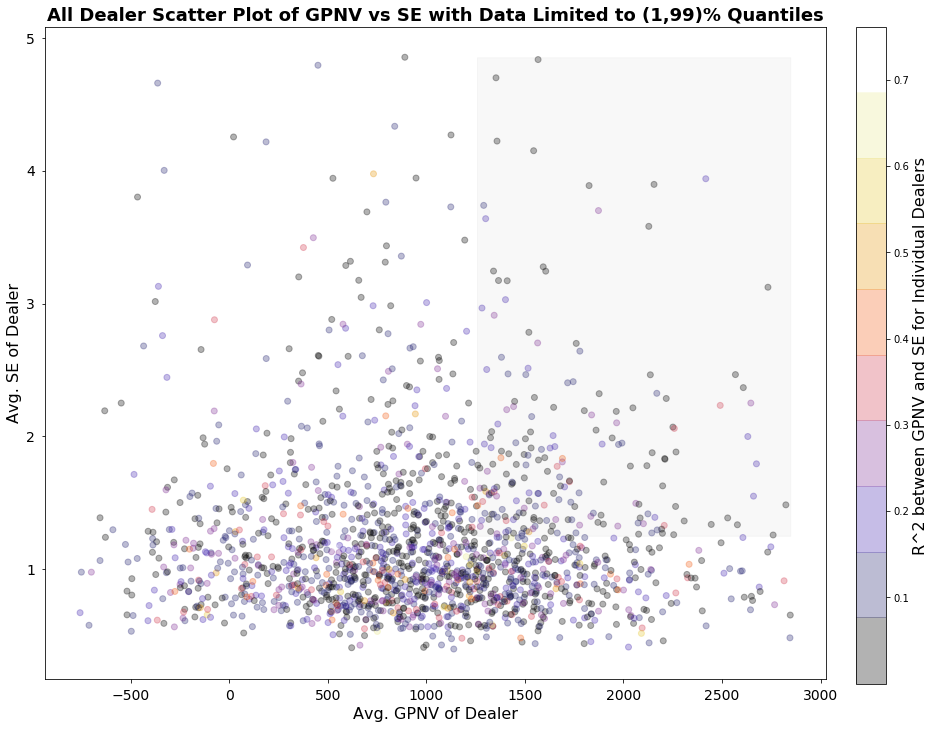

In [5]:
fig= plt.figure(figsize = (14,12))  
ax = plt.scatter(coef['GPNV'] , coef['SE'] , c = coef['R2_deg2']  , cmap = discrete_cmap(10, 'CMRmap') , alpha = .3 , label = '') 
plt.xlabel('Avg. GPNV of Dealer' , fontsize = labelfont_size)
plt.ylabel('Avg. SE of Dealer' , fontsize = labelfont_size)
plt.title('All Dealer Scatter Plot of GPNV vs SE with Data Limited to (1,99)% Quantiles' , fontweight = 'bold' , fontsize = figfont_size)
#plt.axvspan(coef['GP_clip'].quantile(.66), coef['GP_clip'].max(), facecolor='0.2', alpha=0.5)
#plt.axhspan(coef['SE_clip'].quantile(.66), coef['SE_clip'].max(), facecolor='0.2', alpha=0.5)
plt.fill_between(np.arange(coef['GPNV'].quantile(.66) , coef['GPNV'].max() , .01), 
                 coef['SE'].quantile(.66), coef['SE'].max(), color='grey', alpha='0.05')
plt.tick_params(labelsize=ticksize, pad=6)
cbar_ax = fig.add_axes([.93, 0.12, 0.03, 0.76])
cbar = fig.colorbar(ax, cax=cbar_ax)
cbar.set_label('R^2 between GPNV and SE for Individual Dealers', fontsize = labelfont_size)
#fig.savefig('./Proj_2_export/export_graph/GP_SE_2/GP_SE_scattering.png' , dpi = 300)

Text(0.5, 70, 'Avg |R^2| = 0.13')

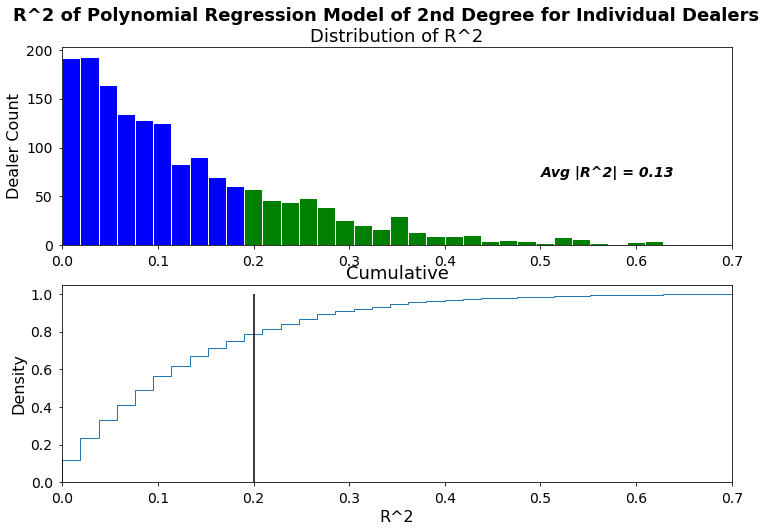

In [6]:
fig = plt.figure(figsize = (12,8))
fig.suptitle('R^2 of Polynomial Regression Model of 2nd Degree for Individual Dealers' , fontweight = 'bold' , fontsize = figfont_size , y = .95)
ax1  = fig.add_subplot(211)
_ , bins, patches = ax1.hist(coef['R2_deg2'], 40 , edgecolor='white', linewidth=1 )
for i in range(0,10): 
    patches[i].set_facecolor('b')
for i in range(10, len(patches)):
    patches[i].set_facecolor('g')
ax1.set_xlim(0,.7)
ax1.set_ylabel('Dealer Count', fontsize = labelfont_size)
ax1.set_title('Distribution of R^2' , fontsize = titlefont_size)    
plt.tick_params(labelsize=ticksize, pad=6)
ax2 = plt.subplot(212 , sharex = ax1 )
ax2.hist(coef['R2_deg2'], 40 , cumulative=True , histtype = 'step' , density = True)
ax2.vlines(.2, 0 , 1)
ax2.set_title('Cumulative' , fontsize = titlefont_size)
ax2.set_xlabel('R^2' , fontsize = labelfont_size)
ax2.set_ylabel('Density' , fontsize = labelfont_size)
plt.tick_params(labelsize=ticksize, pad=6)
tmpAvgR2 = np.average(coef['R2_deg2'])
ax1.text (.5,70, 'Avg |R^2| = {:.2f}'.format(tmpAvgR2), style = 'italic' , fontsize = 14 , fontweight = 'bold' )

#fig.savefig('./Proj_2_export/export_graph/GP_SE_2/R_2_deg_2_distribution.png' , dpi = 300) 

Text(0.5, 70, 'Avg |R^2| = 0.17')

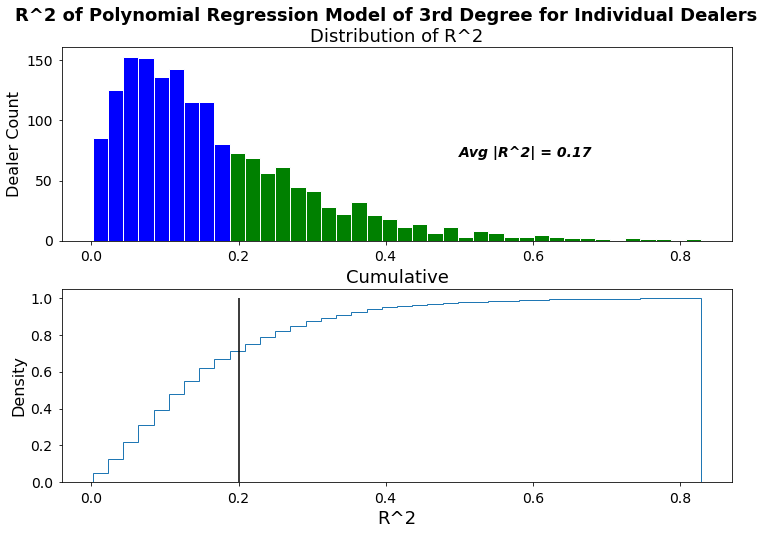

In [7]:
fig = plt.figure(figsize = (12,8))
fig.suptitle('R^2 of Polynomial Regression Model of 3rd Degree for Individual Dealers' , fontweight = 'bold' , fontsize = figfont_size , y = .95)
ax1  = fig.add_subplot(211)
_ , bins, patches = ax1.hist(coef['R2_deg3'], 40 , edgecolor='white', linewidth=1 )
for i in range(0,9): 
    patches[i].set_facecolor('b')
for i in range(9, len(patches)):
    patches[i].set_facecolor('g')
ax1.set_title('Distribution of R^2' , fontsize = titlefont_size) 
ax1.set_ylabel('Dealer Count' , fontsize = labelfont_size)
plt.tick_params(labelsize=ticksize, pad=6)
ax2 = plt.subplot(212 , sharex = ax1 )
ax2.hist(coef['R2_deg3'], 40 , cumulative=True , histtype = 'step' , density = True)
ax2.vlines(.2, 0 , 1)
ax2.set_title('Cumulative' , fontsize = titlefont_size)
ax2.set_xlabel('R^2', fontsize = titlefont_size)
ax2.set_ylabel('Density' , fontsize = labelfont_size)
plt.tick_params(labelsize=ticksize, pad=6)
plt.subplots_adjust(hspace=.25)
tmpAvgR2 = np.average(coef['R2_deg3'])
ax1.text (.5,70, 'Avg |R^2| = {:.2f}'.format(tmpAvgR2), style = 'italic' , fontsize = 14 , fontweight = 'bold' )

#fig.savefig('./Proj_2_export/export_graph/GP_SE_2/R_2_deg_3_distribution.png' , dpi = 300)     


Text(0.5, 70, 'Avg |Corr| = 0.25')

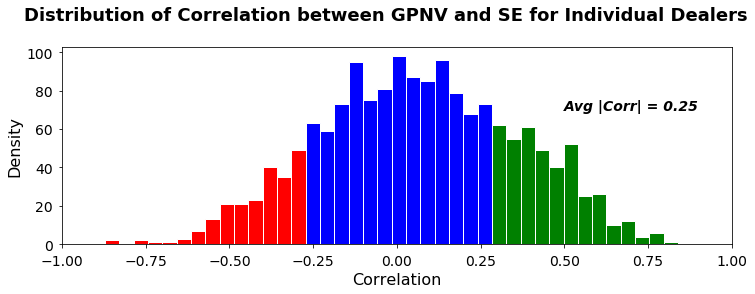

In [8]:
fig = plt.figure(figsize = (12,8))
fig.suptitle('Distribution of Correlation between GPNV and SE for Individual Dealers' , fontweight = 'bold', fontsize = figfont_size, y = .95)
ax1  = fig.add_subplot(211)
_ , bins, patches = ax1.hist(coef['correlation'], 40 , edgecolor='white', linewidth=1)
for i in range(0,14): 
    patches[i].set_facecolor('r')
for i in range(14, 27):
    patches[i].set_facecolor('b')
for i in range(27,len(patches) ): 
    patches[i].set_facecolor('g')
ax1.set_xlim(-1,1)
ax1.set_xlabel('Correlation' , fontsize = labelfont_size)
ax1.set_ylabel('Density' , fontsize = labelfont_size)
plt.tick_params(labelsize=ticksize, pad=6)
tmpAvgOfAbsCorrelation = np.average(abs(coef['correlation']))
ax1.text (.5,70, 'Avg |Corr| = {:.2f}'.format(tmpAvgOfAbsCorrelation), style = 'italic' , fontsize = 14 , fontweight = 'bold' )

#fig.savefig('./Proj_2_export/export_graph/GP_SE_2/correlation_distribution.png' , dpi = 300) 

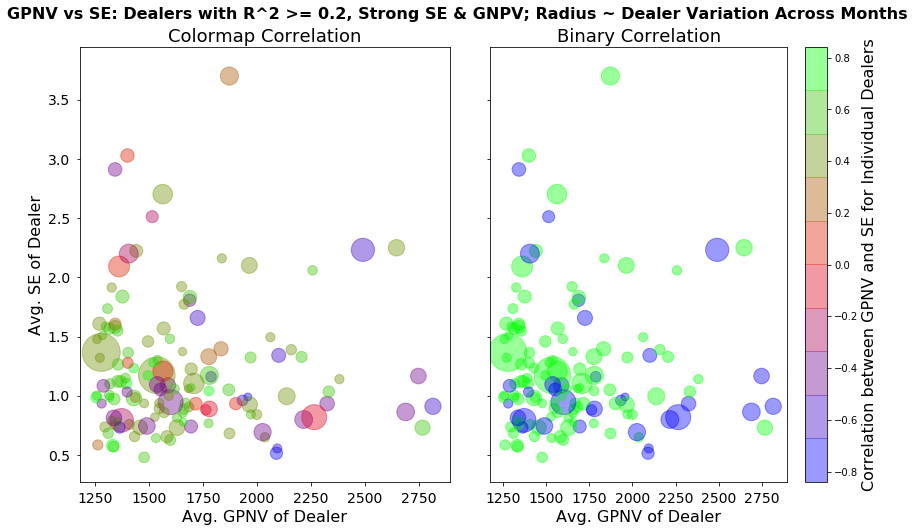

In [9]:
df = coef[(coef['R2_deg2'] > .19) & (coef['GPNV'] > coef['GPNV'] .quantile(.66)) & (coef['R2_deg2'] > coef['R2_deg2'].quantile(.66))]

fig , (ax1,ax2) = plt.subplots(1,2 , figsize = (14,8) , sharey = True) 
plt.suptitle('GPNV vs SE: Dealers with R^2 >= 0.2, Strong SE & GNPV; Radius ~ Dealer Variation Across Months', fontsize = labelfont_size, fontweight = 'bold' , y = .95 )
ax = ax1.scatter(df['GPNV'], df['SE'], cmap = discrete_cmap(10, 'brg') , 
                 c = df['correlation'], s = 100*df['radius_scaled'], alpha = .4)

ax1.set_title('Colormap Correlation' , fontsize = titlefont_size)
ax1.set_ylabel('Avg. SE of Dealer', fontsize = labelfont_size)
ax1.set_xlabel('Avg. GPNV of Dealer' , fontsize = labelfont_size)
ax1.tick_params(labelsize=ticksize, pad=6)

ax2.scatter(df['GPNV'] , df['SE'] , cmap = discrete_cmap(2, 'brg') , 
                 c = df['correlation'] , s = 100*df['radius_scaled'] , alpha = .4)
ax2.set_xlabel('Avg. GPNV of Dealer' , fontsize = labelfont_size)
ax2.set_title('Binary Correlation' , fontsize = titlefont_size)
cbar = fig.colorbar(ax)
cbar.set_label('Correlation between GPNV and SE for Individual Dealers' , fontsize = labelfont_size)

plt.tick_params(labelsize=ticksize, pad=6)
plt.subplots_adjust(wspace= .11)
#fig.tight_layout()
#fig.savefig('./Proj_2_export/export_graph/GP_SE_2/GP_SE_scttering_strong_region_R_.02.png' , dpi = 300)


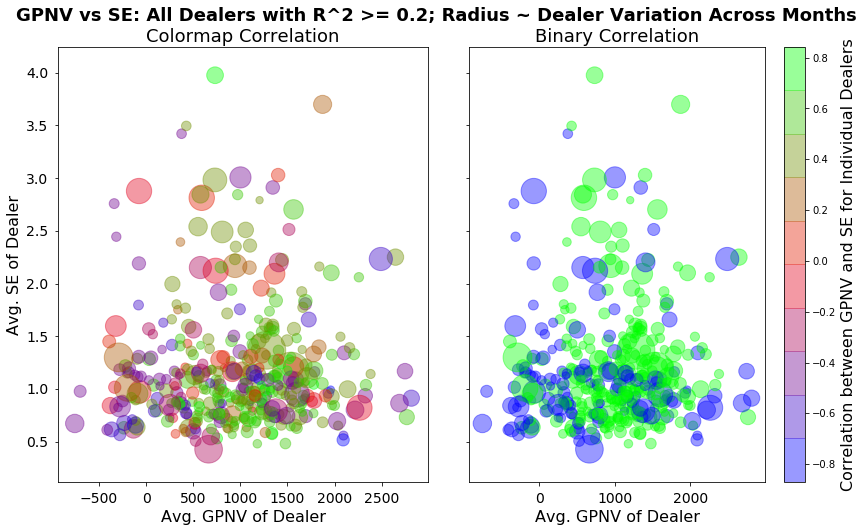

In [10]:
df = coef[(coef['R2_deg2'] > .19)]
fig , (ax1,ax2) = plt.subplots(1,2 , figsize = (14,8) , sharey = True)
plt.suptitle('GPNV vs SE: All Dealers with R^2 >= 0.2; Radius ~ Dealer Variation Across Months', fontsize = figfont_size ,  fontweight = 'bold' , y = .95)
ax = ax1.scatter(df['GPNV'] , df['SE'] , cmap = discrete_cmap(10, 'brg') , 
                 c = df['correlation'] , s = 100*df['radius_scaled'] , alpha = .4)
ax1.set_ylabel('Avg. SE of Dealer', fontsize = labelfont_size)
ax1.set_xlabel('Avg. GPNV of Dealer' , fontsize = labelfont_size)
ax1.tick_params(labelsize=ticksize, pad=6)
ax1.set_title('Colormap Correlation' , fontsize = titlefont_size)

ax2.scatter(df['GPNV'] , df['SE'] , cmap = discrete_cmap(2, 'brg') , 
                 c = df['correlation'] , s = 100*df['radius_scaled'] , alpha = .4)
ax2.set_xlabel('Avg. GPNV of Dealer' , fontsize = labelfont_size)
ax2.set_title('Binary Correlation' , fontsize = titlefont_size)
cbar = fig.colorbar(ax)
cbar.set_label('Correlation between GPNV and SE for Individual Dealers' , fontsize = labelfont_size)
plt.tick_params(labelsize=ticksize, pad=6)
plt.subplots_adjust(wspace= .11)
#fig.savefig('./Proj_2_export/export_graph/GP_SE_2/GP_SE_scttering_R_.02.png' , dpi = 300)

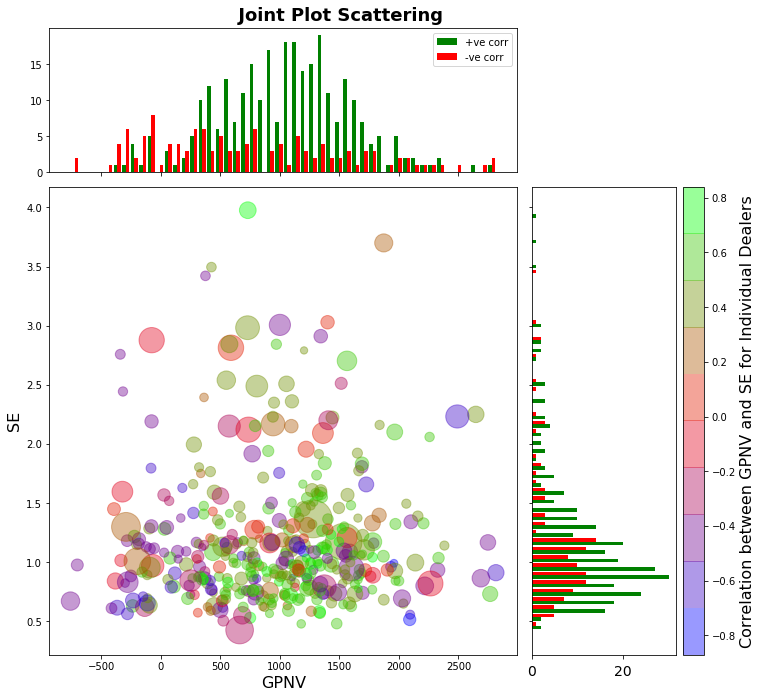

In [11]:
nullfmt = NullFormatter()         # no labels

# the random data
# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.02

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h, bottom, 0.2, height]

# start with a rectangular Figure
fig = plt.figure(1, figsize=(10, 10))
plt.suptitle(' Joint Plot Scattering' , fontsize = figfont_size , y = 1, fontweight = 'bold')


axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)

# no labels
axHistx.xaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)

# the scatter plot:
ax = axScatter.scatter(df['GPNV'] , df['SE'] , cmap = discrete_cmap(10, 'brg') , 
                 c = df['correlation'] , s = 100*df['radius_scaled'] , alpha = .4)
axScatter.set_xlabel('GPNV' , fontsize = labelfont_size)
axScatter.set_ylabel('SE' , fontsize = labelfont_size)
plt.tick_params(labelsize=ticksize, pad=6)


axHistx.hist([df[df['correlation'] > 0]['GPNV'] , df[df['correlation'] < 0]['GPNV']],
         50 , rwidth=.85,  color = ['g','r'] , label = ['+ve corr','-ve corr'])
plt.tick_params(labelsize=ticksize, pad=6)
axHisty.hist([df[df['correlation'] > 0]['SE'] , df[df['correlation'] < 0]['SE']],
         50 , rwidth=.85,  color = ['g','r'] , label = ['+ve corr','-ve corr'],orientation='horizontal')
plt.tick_params(labelsize=ticksize, pad=6)
axHistx.legend()
axHistx.set_xlim(axScatter.get_xlim())
axHisty.set_ylim(axScatter.get_ylim())

cbar_ax = fig.add_axes([.98, 0.1, 0.03, 0.65])
cbar = fig.colorbar(ax, cax=cbar_ax)
cbar.set_label('Correlation between GPNV and SE for Individual Dealers' , fontsize = labelfont_size)

#fig.savefig('./Proj_2_export/export_graph/GP_SE_JointPlotScattering.png') 

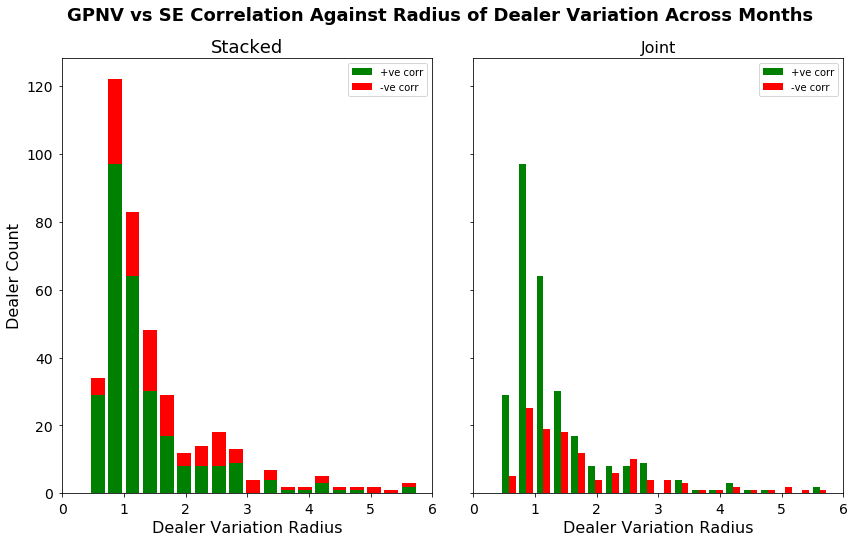

In [12]:
############################################################################################################
####                          Stacked_radius_correlation.png                      #####  

fig , (ax1,ax2) = plt.subplots(1,2 , figsize = (14,8) , sharey = True)
fig.suptitle('GPNV vs SE Correlation Against Radius of Dealer Variation Across Months' , fontsize = figfont_size ,  fontweight = 'bold' , y = .97)
ax1.hist([df[df['correlation'] > 0]['radius_scaled'] , df[df['correlation'] < 0]['radius_scaled']],
         50 ,  stacked=True , histtype= 'barstacked' ,rwidth=0.8 ,  color = ['g','r'] , label = ['+ve corr','-ve corr'])
ax1.set_title('Stacked' , fontsize = titlefont_size )
ax1.set_xlabel('Dealer Variation Radius' , fontsize = labelfont_size)
ax1.set_ylabel('Dealer Count' , fontsize = labelfont_size)
ax1.set_xlim(0,6)
ax1.legend()
ax1.tick_params(labelsize=ticksize, pad=6)

ax2.set_title('Joint' , fontsize = 16 )
ax2.hist([df[df['correlation'] > 0]['radius_scaled'] , df[df['correlation'] < 0]['radius_scaled']],
         50 ,rwidth=0.8 ,  color = ['g','r'] , label = ['+ve corr','-ve corr'])
ax2.set_xlabel('Dealer Variation Radius' , fontsize = labelfont_size)
ax2.set_xlim(0,6)
ax2.legend()
ax2.tick_params(labelsize=ticksize, pad=6)
plt.subplots_adjust(wspace= .11)

#fig.savefig('./Proj_2_export/export_graph/GP_SE_2/Stacked_radius_correlation.png' , dpi = 300)

In [13]:
############################################################################################################
####                          Stacked_size_correlation.png                     #####  
df = coef[(coef['R2_deg2'] > .19)].sort_values(by = 'dealer_size')

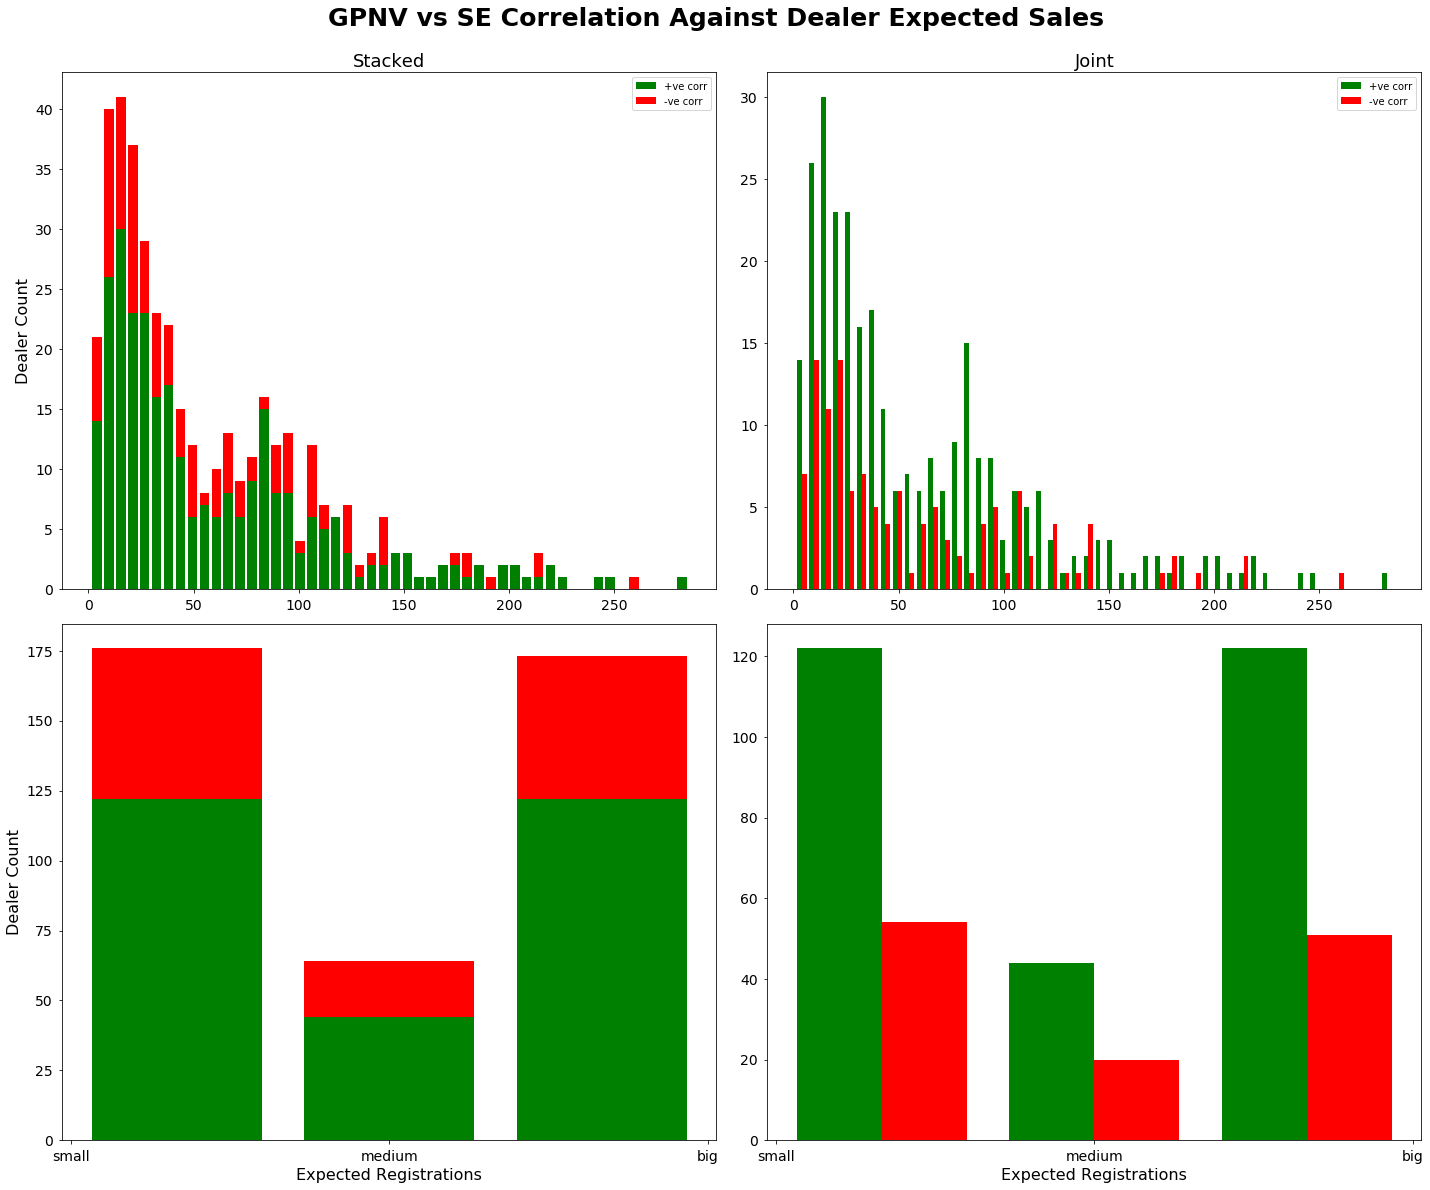

In [14]:
fig , ((ax1,ax3) ,( ax2 , ax4)) = plt.subplots(2,2 , figsize = (20,16))
plt.suptitle('GPNV vs SE Correlation Against Dealer Expected Sales' , fontsize = 1.4*figfont_size , y=1.03, fontweight = 'bold')
ax1.hist([df[df['correlation'] > 0]['dealer_size'] , df[df['correlation'] < 0]['dealer_size']], 50 ,
          stacked=True , rwidth=0.8 , histtype= 'barstacked' , color = ['g','r'] , label = ['+ve corr','-ve corr'] , align = 'mid')
ax1.set_title('Stacked' , fontsize = titlefont_size)
#ax1.set_xlabel('Expected Registrations' , fontsize = 12 )
ax1.set_ylabel('Dealer Count' , fontsize = labelfont_size)
ax1.legend()
ax1.tick_params(labelsize=ticksize, pad=6)
#ax2 = sns.countplot(x = 'size' , hue = 'binary_corr' , data= df  , palette = ['r' , 'g'])
ax2.hist([df[df['correlation'] > 0]['size'] , df[df['correlation'] < 0]['size']], 3,
          stacked=True , rwidth=.8 , histtype= 'barstacked' , color = ['g','r'] , label = ['+ve corr','-ve corr'] , align = 'mid' )
ax2.set_xlabel('Expected Registrations' , fontsize = labelfont_size )
ax2.set_ylabel('density' , fontsize = labelfont_size)
ax2.tick_params(labelsize=ticksize, pad=6)
ax2.set_ylabel('Dealer Count' , fontsize = labelfont_size)
ax3.set_title('Joint' , fontsize = titlefont_size)
ax3.hist([df[df['correlation'] > 0]['dealer_size'] , df[df['correlation'] < 0]['dealer_size']], 50 ,
          rwidth=0.8 , color = ['g','r'] , label = ['+ve corr','-ve corr'] , align = 'mid')
ax3.tick_params(labelsize=ticksize, pad=6)
ax3.legend()
ax4.hist([df[df['correlation'] > 0]['size'] , df[df['correlation'] < 0]['size']],  3,
           rwidth=.8, color = ['g','r'] , label = ['+ve corr','-ve corr'] , align = 'mid')
ax4.set_xlabel('Expected Registrations' , fontsize = labelfont_size )
plt.tick_params(labelsize=ticksize, pad=6)
fig.tight_layout()
#fig.savefig('./Proj_2_export/export_graph/GP_SE_2/Stacked_size_correlation.png' , dpi = 300)

In [15]:
############################################################################################################
####                          Joint_age_correlation.png                     #####  
df = coef[(coef['R2_deg2'] > .19)].sort_values(by = 'AGE')

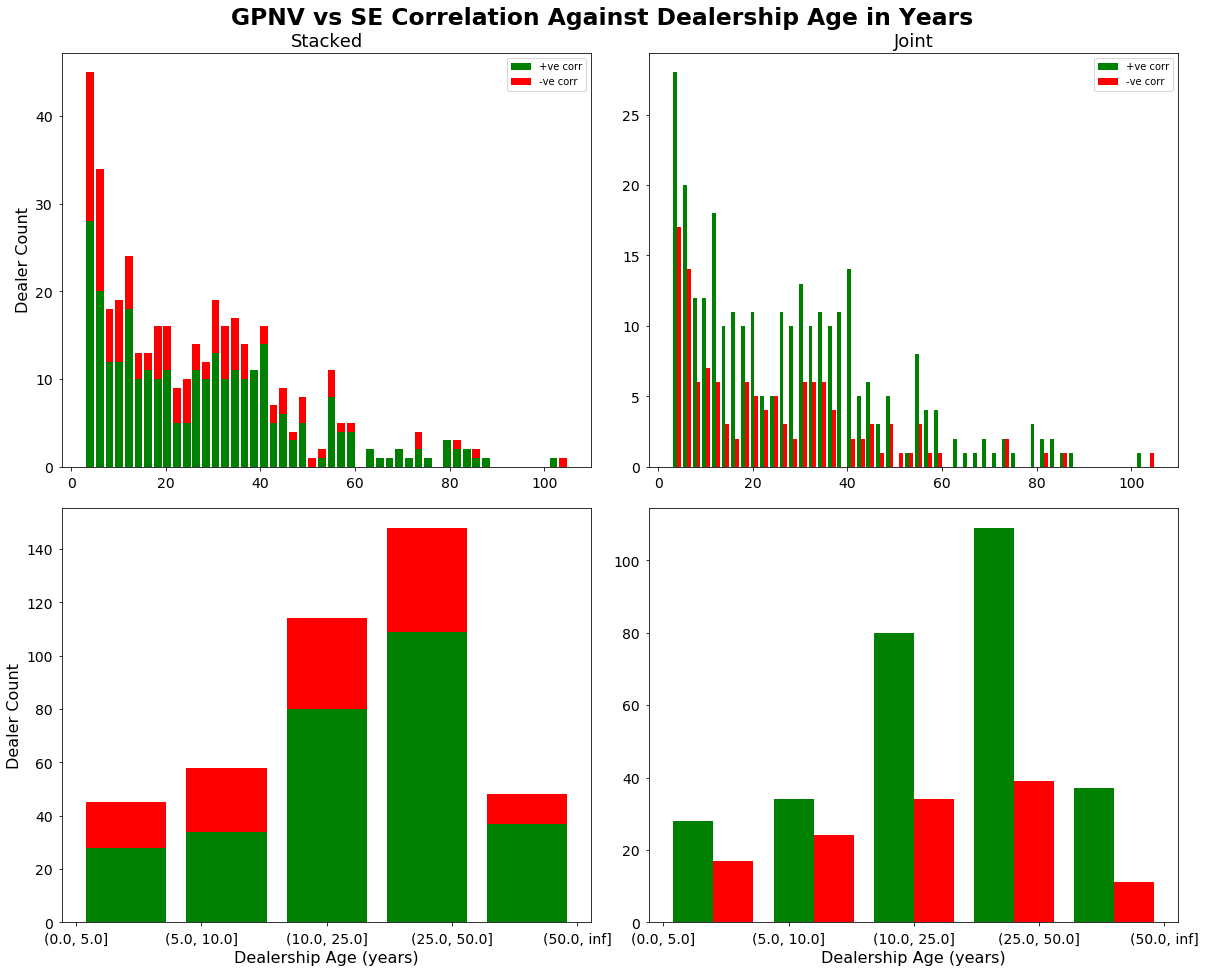

In [16]:
fig , ((ax1,ax3) ,( ax2 , ax4)) = plt.subplots(2,2 , figsize = (20,16))
plt.suptitle('GPNV vs SE Correlation Against Dealership Age in Years' , fontsize = 1.3*figfont_size , y = .92, fontweight = 'bold')
ax1.hist([df[df['correlation'] > 0]['AGE'] , df[df['correlation'] < 0]['AGE']], 50 ,
          rwidth=0.8, stacked=True  , histtype= 'barstacked', color = ['g','r'] , label = ['+ve corr','-ve corr'] , align = 'mid')
ax1.tick_params(labelsize=ticksize, pad=6)
ax1.set_ylabel('Dealer Count' , fontsize = labelfont_size)
ax1.legend()
ax2.hist([df[df['correlation'] > 0]['age_dis'] , df[df['correlation'] < 0]['age_dis']],  5,
           stacked=True  , histtype= 'barstacked', rwidth=.8, color = ['g','r'] , label = ['+ve corr','-ve corr'] , align = 'mid')
ax1.set_title('Stacked' , fontsize = titlefont_size)
ax2.set_xlabel('Dealership Age (years)' , fontsize = labelfont_size )
ax2.set_ylabel('Dealer Count' , fontsize = labelfont_size)
ax2.tick_params(labelsize=ticksize, pad=6)

ax3.hist([df[df['correlation'] > 0]['AGE'] , df[df['correlation'] < 0]['AGE']], 50 ,
          rwidth=0.8 , color = ['g','r'] , label = ['+ve corr','-ve corr'] , align = 'mid')
#ax3.set_ylabel('Dealer Count' , fontsize = labelfont_size)
ax3.tick_params(labelsize=ticksize, pad=6)
ax3.legend()
ax3.set_title('Joint' , fontsize = titlefont_size)
ax4.hist([df[df['correlation'] > 0]['age_dis'] , df[df['correlation'] < 0]['age_dis']],  5,
           rwidth=.8, color = ['g','r'] , label = ['+ve corr','-ve corr'] , align = 'mid')
ax4.set_xlabel('Dealership Age (years)' , fontsize = labelfont_size )
#ax4.set_ylabel('Dealer Count' , fontsize = labelfont_size)
ax4.tick_params(labelsize=ticksize, pad=6)
plt.subplots_adjust(hspace= .10 , wspace= .11)
#fig.tight_layout()

#fig.savefig('./Proj_2_export/export_graph/GP_SE_2/Joint_age_correlation.png' , dpi = 300) put the dealers categories xticks 
# older dealerships better managing 

In [17]:
############################################################################################################
####                          Joint_POP_correlation.png                     #####  
df = coef[(coef['R2_deg2'] > .19)].sort_values(by = 'CY_POP')

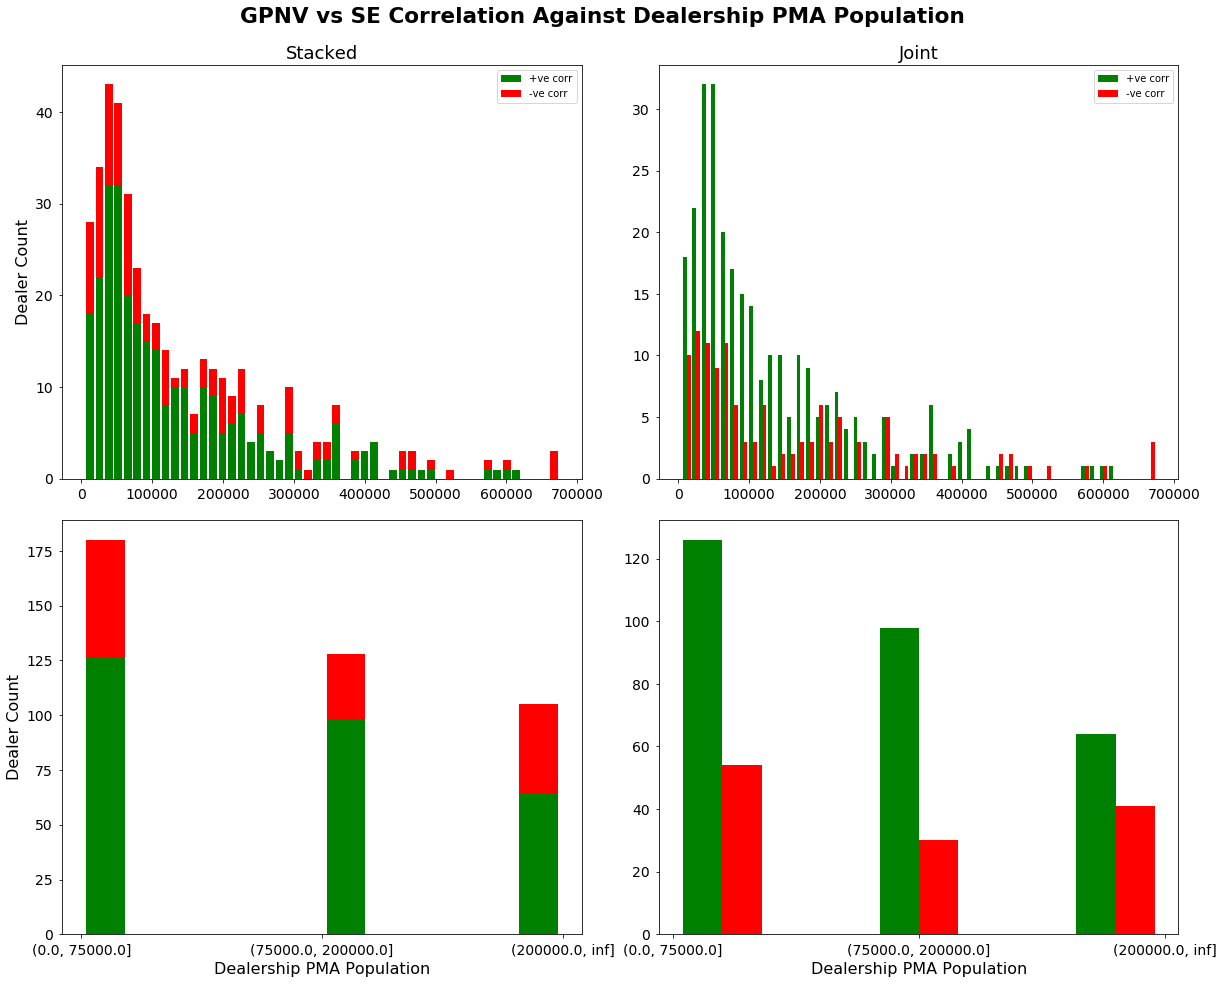

In [18]:
fig , ((ax1,ax3) ,( ax2 , ax4)) = plt.subplots(2,2 , figsize = (20,16))
plt.suptitle('GPNV vs SE Correlation Against Dealership PMA Population' , fontsize = 1.2*figfont_size , y = .93, fontweight = 'bold')
ax1.hist([df[df['correlation'] > 0]['CY_POP'] , df[df['correlation'] < 0]['CY_POP']], 50 ,
          rwidth=0.8, stacked=True  , histtype= 'barstacked', color = ['g','r'] , label = ['+ve corr','-ve corr'] , align = 'mid')
ax1.tick_params(labelsize=ticksize, pad=6)
ax1.set_ylabel('Dealer Count' , fontsize = labelfont_size)
ax1.legend()
ax1.set_title('Stacked' , fontsize = titlefont_size)
ax2.hist([df[df['correlation'] > 0]['POP_dis'] , df[df['correlation'] < 0]['POP_dis']], 
           stacked=True  , histtype= 'barstacked', rwidth=.8, color = ['g','r'] , label = ['+ve corr','-ve corr'] , align = 'mid')
ax2.set_xlabel('Dealership PMA Population' , fontsize = labelfont_size )
ax2.set_ylabel('Dealer Count' , fontsize = labelfont_size)
ax2.tick_params(labelsize=ticksize, pad=6)
ax3.hist([df[df['correlation'] > 0]['CY_POP'] , df[df['correlation'] < 0]['CY_POP']], 50 ,
          rwidth=0.8 , color = ['g','r'] , label = ['+ve corr','-ve corr'] , align = 'mid')

ax3.tick_params(labelsize=ticksize, pad=6)
ax3.legend()
ax3.set_title('Joint' , fontsize = titlefont_size)
ax4.hist([df[df['correlation'] > 0]['POP_dis'] , df[df['correlation'] < 0]['POP_dis']],  5,
           rwidth=.8, color = ['g','r'] , label = ['+ve corr','-ve corr'] , align = 'mid')
ax4.set_xlabel('Dealership PMA Population' , fontsize = labelfont_size )
ax4.tick_params(labelsize=ticksize, pad=6)
plt.subplots_adjust(hspace= .10 , wspace= .15)

#fig.tight_layout()
#fig.savefig('./Proj_2_export/export_graph/GP_SE_2/Joint_POP_correlation.png' , dpi = 300) replacing xticks with range 

In [19]:
############################################################################################################
####                          Joint_income_correlation.png                     #####  
df = coef[(coef['R2_deg2'] > .19)].sort_values(by = 'CY_AHI_HH')

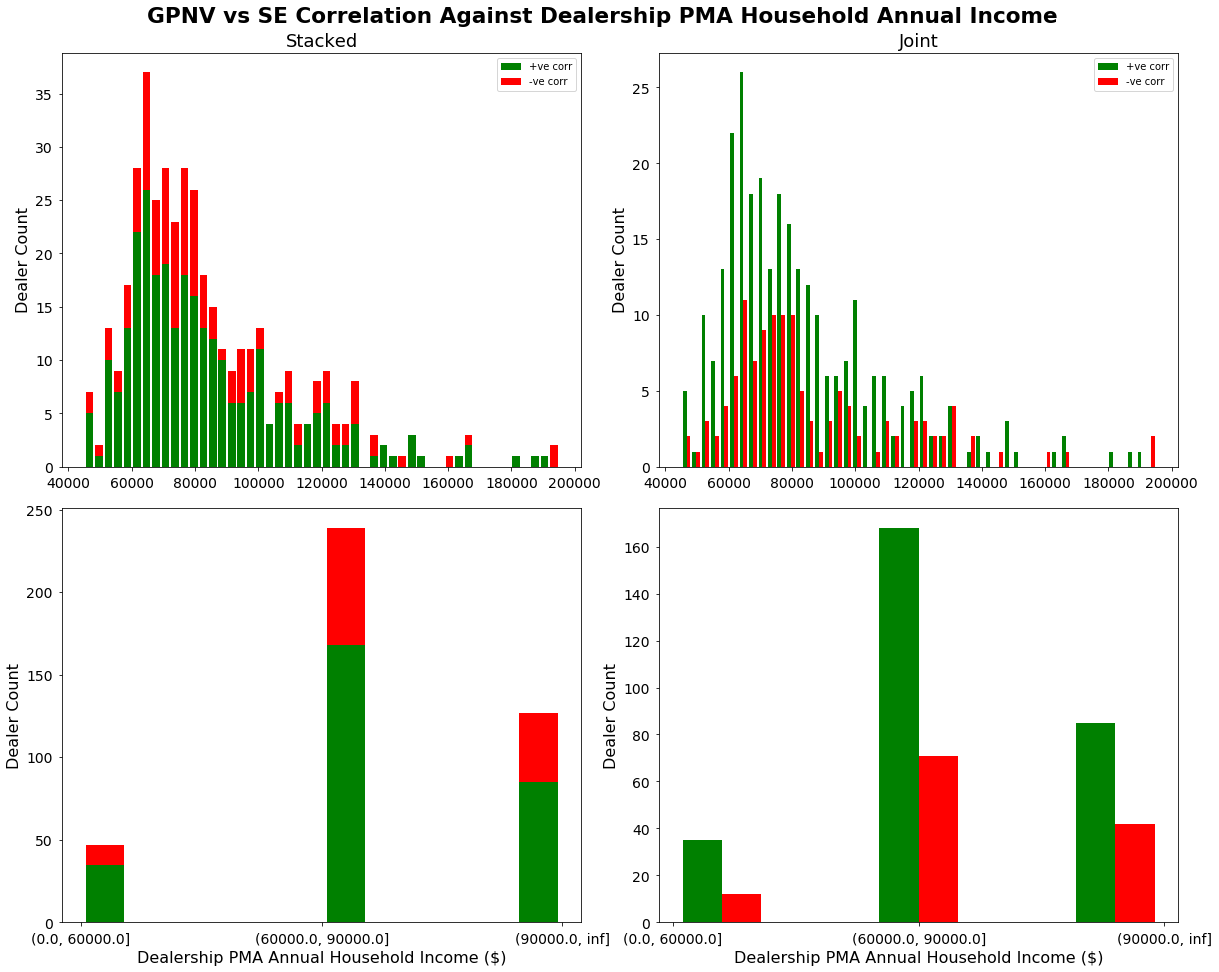

In [20]:
fig , ((ax1,ax3) ,( ax2 , ax4)) = plt.subplots(2,2 , figsize = (20,16))
plt.suptitle('GPNV vs SE Correlation Against Dealership PMA Household Annual Income' , fontsize = 1.2*figfont_size , y = .92, fontweight = 'bold')
ax1.hist([df[df['correlation'] > 0]['CY_AHI_HH'] , df[df['correlation'] < 0]['CY_AHI_HH']], 50 ,
          rwidth=0.8, stacked=True  , histtype= 'barstacked', color = ['g','r'] , label = ['+ve corr','-ve corr'] , align = 'mid')
ax1.set_ylabel('Dealer Count' , fontsize = labelfont_size)
ax1.tick_params(labelsize=ticksize, pad=6)
ax1.legend()
ax1.set_title('Stacked' , fontsize = titlefont_size)
ax2.hist([df[df['correlation'] > 0]['Inc_dis'] , df[df['correlation'] < 0]['Inc_dis']], 
           stacked=True  , histtype= 'barstacked', rwidth=.8, color = ['g','r'] , label = ['+ve corr','-ve corr'] , align = 'mid')
ax2.set_xlabel('Dealership PMA Annual Household Income ($)' , fontsize = labelfont_size )
ax2.set_ylabel('Dealer Count' , fontsize = labelfont_size)
ax2.tick_params(labelsize=ticksize, pad=6)
ax3.hist([df[df['correlation'] > 0]['CY_AHI_HH'] , df[df['correlation'] < 0]['CY_AHI_HH']], 50 ,
          rwidth=0.8 , color = ['g','r'] , label = ['+ve corr','-ve corr'] , align = 'mid')
ax3.set_title('Joint' , fontsize = titlefont_size)
ax3.set_ylabel('Dealer Count' , fontsize = labelfont_size)
ax3.tick_params(labelsize=ticksize, pad=6)
ax3.legend()
ax4.hist([df[df['correlation'] > 0]['Inc_dis'] , df[df['correlation'] < 0]['Inc_dis']],  5,
        rwidth=.8, color = ['g','r'] , label = ['+ve corr','-ve corr'] , align = 'mid')
ax4.set_xlabel('Dealership PMA Annual Household Income ($)' , fontsize = labelfont_size )
ax4.set_ylabel('Dealer Count' , fontsize = labelfont_size)
ax4.tick_params(labelsize=ticksize, pad=6)
plt.subplots_adjust(hspace= .10 , wspace= .15)

#fig.savefig('./Proj_2_export/export_graph/GP_SE_2/Joint_income_correlation.png' , dpi = 300)

In [21]:
############################################################################################################
####                          Joint_HouseHold_correlation.png                     #####  
df = coef[(coef['R2_deg2'] > .19)].sort_values(by = 'CY_HH')

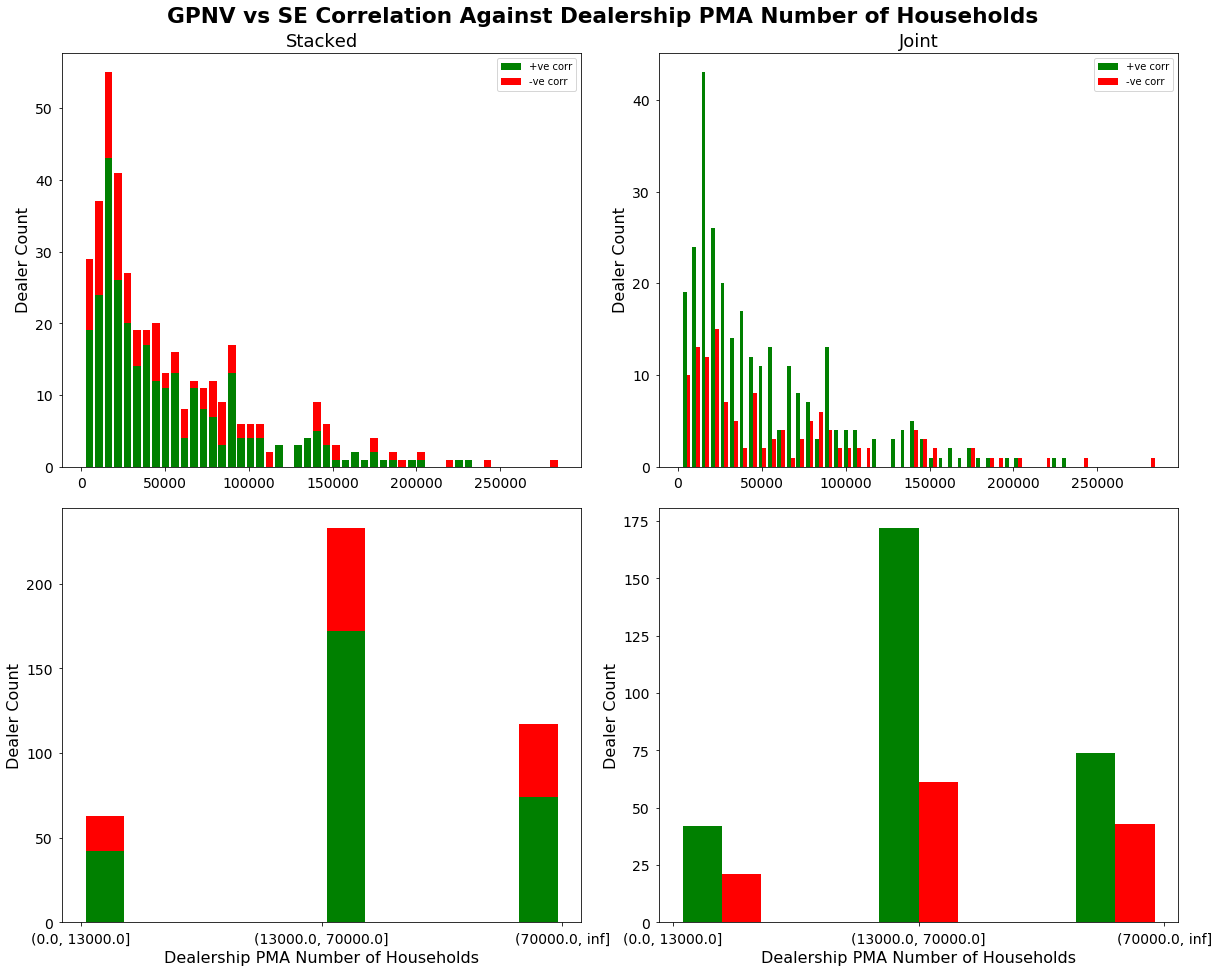

In [22]:
fig , ((ax1,ax3) ,( ax2 , ax4)) = plt.subplots(2,2 , figsize = (20,16))
fig.suptitle('GPNV vs SE Correlation Against Dealership PMA Number of Households' , fontsize = 1.2*figfont_size , y = .92, fontweight = 'bold')
ax1.hist([df[df['correlation'] > 0]['CY_HH'] , df[df['correlation'] < 0]['CY_HH']], 50 ,
          rwidth=0.8, stacked=True  , histtype= 'barstacked', color = ['g','r'] , label = ['+ve corr','-ve corr'] , align = 'mid')
ax1.set_ylabel('Dealer Count' , fontsize = labelfont_size)
ax1.tick_params(labelsize=ticksize, pad=6)
ax1.legend()
ax1.set_title('Stacked' , fontsize = titlefont_size)
ax2.hist([df[df['correlation'] > 0]['HH_dis'] , df[df['correlation'] < 0]['HH_dis']], 
           stacked=True  , histtype= 'barstacked', rwidth=.8, color = ['g','r'] , label = ['+ve corr','-ve corr'] , align = 'mid')
ax2.set_xlabel('Dealership PMA Number of Households' , fontsize = labelfont_size )
ax2.set_ylabel('Dealer Count' , fontsize = labelfont_size)
ax2.tick_params(labelsize=ticksize, pad=6)
ax3.hist([df[df['correlation'] > 0]['CY_HH'] , df[df['correlation'] < 0]['CY_HH']], 50 ,
          rwidth=0.8 , color = ['g','r'] , label = ['+ve corr','-ve corr'] , align = 'mid')
ax3.set_ylabel('Dealer Count' , fontsize = labelfont_size)
ax3.tick_params(labelsize=ticksize, pad=6)
ax3.legend()
ax3.set_title('Joint' , fontsize = titlefont_size)
ax4.hist([df[df['correlation'] > 0]['HH_dis'] , df[df['correlation'] < 0]['HH_dis']],  5,
           rwidth=.8, color = ['g','r'] , label = ['+ve corr','-ve corr'] , align = 'mid')
ax4.set_xlabel('Dealership PMA Number of Households' , fontsize = labelfont_size )
ax4.set_ylabel('Dealer Count' , fontsize = labelfont_size)
ax4.tick_params(labelsize=ticksize, pad=6)
plt.subplots_adjust(hspace= .10 , wspace= .15)

#fig.savefig('./Proj_2_export/export_graph/GP_SE_2/Joint_household_correlation.png' , dpi = 300)

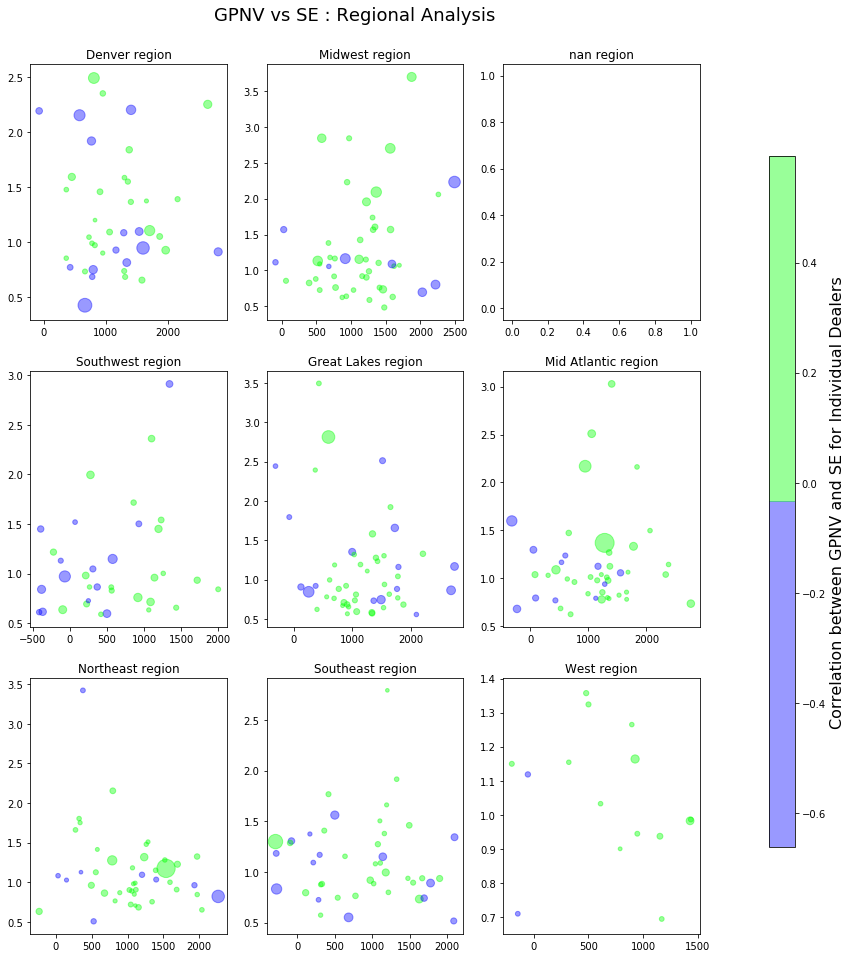

In [23]:
############################################################################################################
####                          Joint_Region_correlation.png                     #####  
fig = plt.figure(figsize=(12,16))
fig.suptitle('GPNV vs SE : Regional Analysis' , fontsize = figfont_size , y = .93)
gs=GridSpec(3,3)
k=0
for i in range(3):
    for j in range(3):
        plt.subplot(gs[i,j])
        a = df[df['region'] == df.region.unique()[k] ]
        ax = plt.scatter(a['GPNV'] , a['SE'] ,marker='.' , c = a['correlation'] , cmap = discrete_cmap(2, 'brg') , s = 100*a['radius_scaled'] , alpha = .4 )
        plt.title('{} region'.format(df.region.unique()[k]))
        k+=1

cbar_ax = fig.add_axes([.98, 0.2, 0.03, 0.6])
cbar = fig.colorbar(ax, cax=cbar_ax)
cbar.set_label('Correlation between GPNV and SE for Individual Dealers' , fontsize = labelfont_size)
#fig.savefig('./Proj_2_export/export_graph/GPNV_SE_WO_outliers_regional.png')
   
### Groupby summary ????            

In [24]:
############################################################################################################
####                          Random Forest : R^2 > 0.19                     #####  
df = coef[(coef['R2_deg2'] > .19)]

In [25]:
pd.DataFrame(df.columns)

,0
0,dealer
1,#ofrecords
2,correlation
3,radius_scaled
4,radius
...,...
86,Inc_dis
87,HH_dis
88,binary_corr
89,state


In [26]:
index_1 = df.columns.get_loc('GPNV_norm')
index_2 = df.columns.get_loc('Sales Effectiveness - CJDRTruck_norm')
X = pd.concat([df.iloc[:,index_1:index_2], pd.get_dummies(df.iloc[:,83:88]), pd.get_dummies(df.iloc[:,90])], axis = 1 , sort = False )
y = df['correlation']

In [27]:
regr = RandomForestRegressor()
regr.fit(X, y)
importance = regr.feature_importances_
indices_tree = np.argsort(regr.feature_importances_)[::-1]

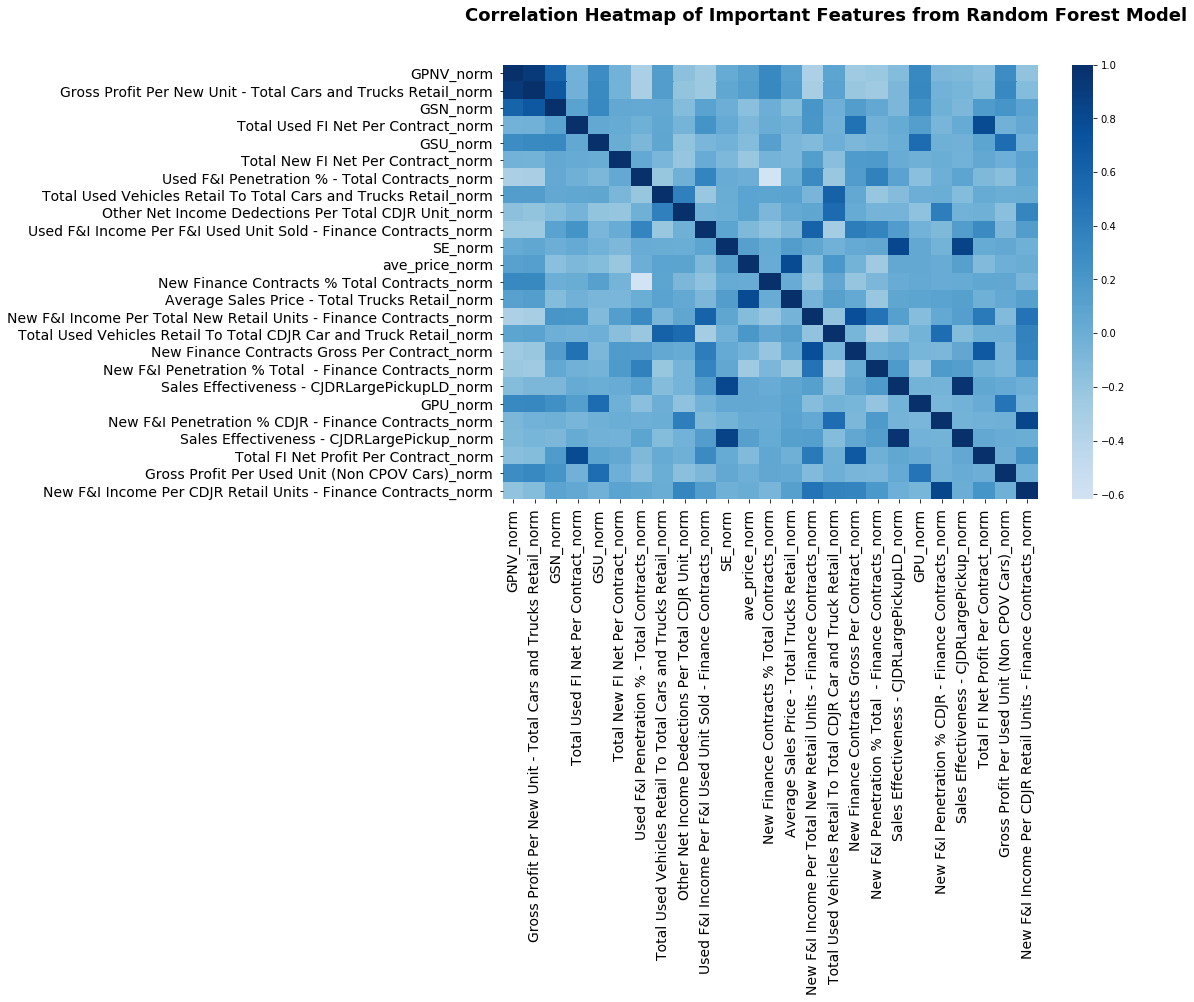

In [28]:
# Correlation Heatmap
fig, ax = plt.subplots(figsize=(12,8))
fig.suptitle('Correlation Heatmap of Important Features from Random Forest Model' , fontsize = figfont_size , fontweight = 'bold')
sns.heatmap(X[X.columns[indices_tree[:25]]].corr(), center=0 , cmap = 'Blues')
plt.tick_params(labelsize=ticksize, pad=6)

In [29]:
print(X.columns)
print('Normalized KPIs fed to Random Forest Model:' ,X.columns.shape[0])

Index(['GPNV_norm',
       'Gross Profit Per New Unit - Total Cars and Trucks Retail_norm',
       'Average Sales Price - Total Trucks Retail_norm', 'ave_price_norm',
       'Average Sales Price - Total Cars and Trucks Retail_norm',
       'Total Used Vehicles Retail To Total Cars and Trucks Retail_norm',
       'Total Used Vehicles Retail To Total CDJR Car and Truck Retail_norm',
       'New F&I Penetration % CDJR - Finance Contracts_norm',
       'New F&I Penetration % Total  - Finance Contracts_norm',
       'New F&I Penetration % CDJR - Total Contracts_norm',
       'New F&I Penetration % Total  - Total Contracts_norm',
       'New F&I Income Per CDJR Retail Units - Finance Contracts_norm',
       'New F&I Income Per Total New Retail Units - Finance Contracts_norm',
       'Used F&I Penetration % - Total Contracts_norm',
       'Used F&I Income Per F&I Used Unit Sold - Finance Contracts_norm',
       'Gross Profit Per Used Unit (Non CPOV Cars)_norm', 'GPU_norm',
       'GSN_norm', 


# Highly correlated features are removed from consideration.

In [30]:
columns_to_keep = ['GPNV_norm' , 'ave_price_norm' ,'GSN_norm' , 'GSU_norm', 'Total FI Gross Profit Per Contract_norm' ,
        'Total Used Vehicles Retail To Total CDJR Car and Truck Retail_norm',
       'Other Net Income Dedections Per Total CDJR Unit_norm', 'SE_norm', 'size_medium', 'size_small', 'age_dis_(0.0, 5.0]',
       'age_dis_(10.0, 25.0]', 'age_dis_(25.0, 50.0]', 'age_dis_(5.0, 10.0]',
       'age_dis_(50.0, inf]', 'POP_dis_(0.0, 75000.0]',
       'POP_dis_(200000.0, inf]', 'POP_dis_(75000.0, 200000.0]',
       'Inc_dis_(0.0, 60000.0]', 'Inc_dis_(60000.0, 90000.0]',
       'Inc_dis_(90000.0, inf]', 'HH_dis_(0.0, 13000.0]',
       'HH_dis_(13000.0, 70000.0]', 'HH_dis_(70000.0, inf]', 'California',
       'Denver', 'Great Lakes', 'Mid Atlantic', 'Midwest', 'Northeast',
       'Southeast', 'Southwest', 'West']

In [31]:
X_2 = X[columns_to_keep]

In [32]:
regr_2 = RandomForestRegressor()
regr_2.fit(X_2, y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

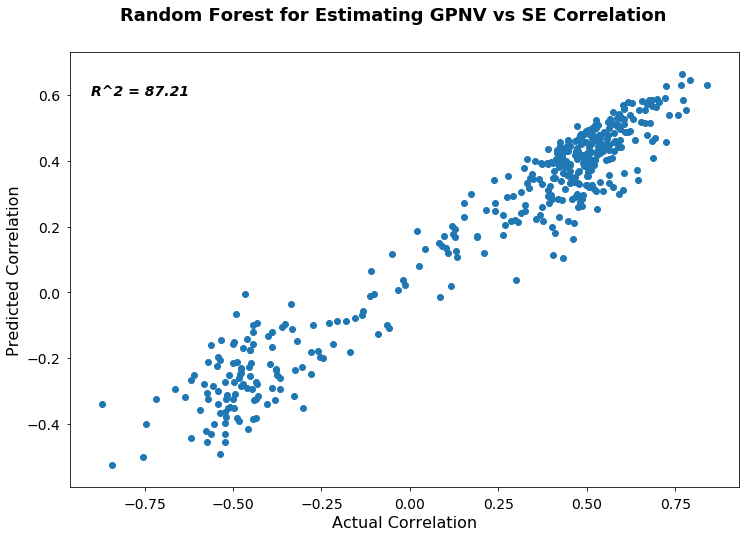

In [33]:
fig= plt.figure(figsize = (12,8))
fig.suptitle('Random Forest for Estimating GPNV vs SE Correlation' , fontsize = figfont_size , y = .96, fontweight = 'bold')
ax = plt.scatter(y , regr_2.predict(X_2))
plt.xlabel('Actual Correlation', fontsize = labelfont_size)
plt.ylabel('Predicted Correlation' , fontsize = labelfont_size)
plt.text ( -.9,.6, 'R^2 = {:.2f}'.format(100*regr_2.score(X_2 , y)) , style = 'italic' , fontsize = 14 , fontweight = 'bold' )
plt.tick_params(labelsize=ticksize, pad=6)

In [34]:
importance = regr_2.feature_importances_
indices_tree = np.argsort(regr_2.feature_importances_)[::-1]

Text(0.5, 0.94, 'Random Forest Feature Importance Analysis')

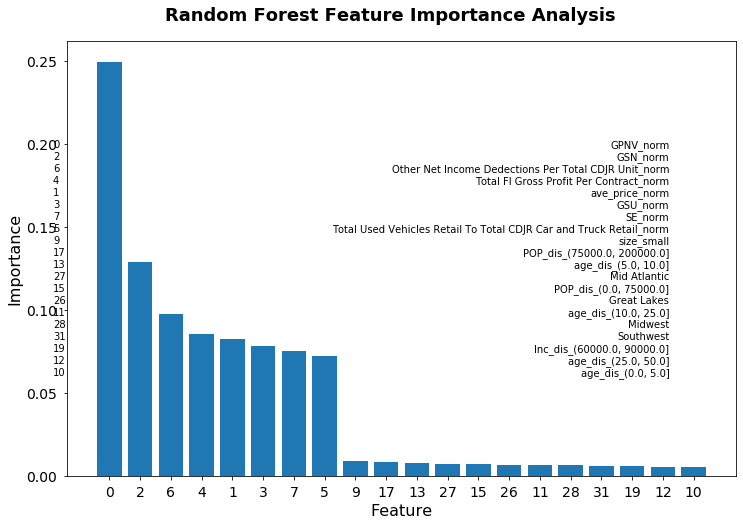

In [35]:
fig= plt.figure(figsize=(12,8))
plt.bar(range(20) , importance[indices_tree[:20]])
plt.xticks(range(20), indices_tree[:20])
plt.xlabel('Feature' , fontsize = labelfont_size)
plt.ylabel('Importance', fontsize = labelfont_size)
plt.tick_params(labelsize=ticksize, pad=6)
plt.table(cellText=np.array(pd.DataFrame(X_2.columns[indices_tree[:20]] , index = indices_tree[:20])) , loc = bottom , rowLabels = indices_tree[:20] , edges = 'open' )
fig.suptitle('Random Forest Feature Importance Analysis' , fontweight = 'bold' , y=0.94, fontsize = figfont_size)
#fig.savefig('./Proj_2_export/export_graph/RandomForest_default_Removed_Correlation_mannualy_featureanalysis.png')

/Users/hamedniakan/opt/anaconda3/lib/python3.7/site-packages/sklearn/inspection/_partial_dependence.py:715: FutureWarning: The fig parameter is deprecated in version 0.22 and will be removed in version 0.24
  FutureWarning)


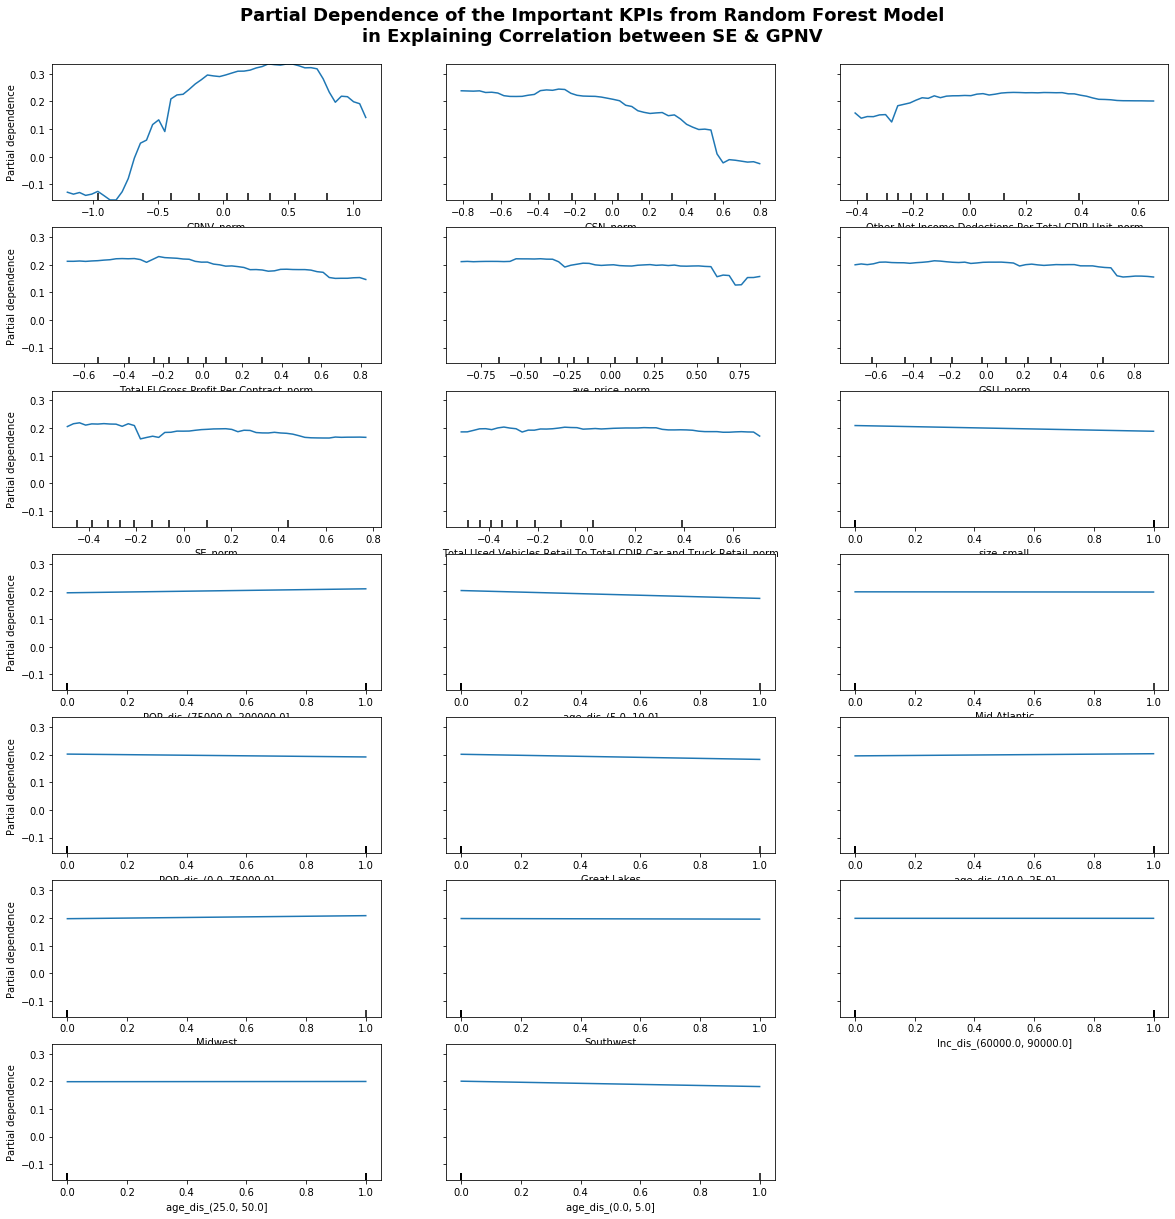

In [36]:
# Partial Dependence of the Importnat KPIs
fig = plt.figure(figsize=(20,20))
plot_partial_dependence(regr_2, X_2, indices_tree[:20],n_jobs=3, feature_names=X_2.columns, grid_resolution=50, fig = fig )
fig = plt.gcf()
fig.suptitle('Partial Dependence of the Important KPIs from Random Forest Model\n'
                 'in Explaining Correlation between SE & GPNV', y = .94, fontsize = figfont_size, fontweight = 'bold')
plt.subplots_adjust(top=0.9)
plt.show()
#fig.savefig('./Proj_2_export/export_graph/RandomForest_partial_dependency_plot.png')

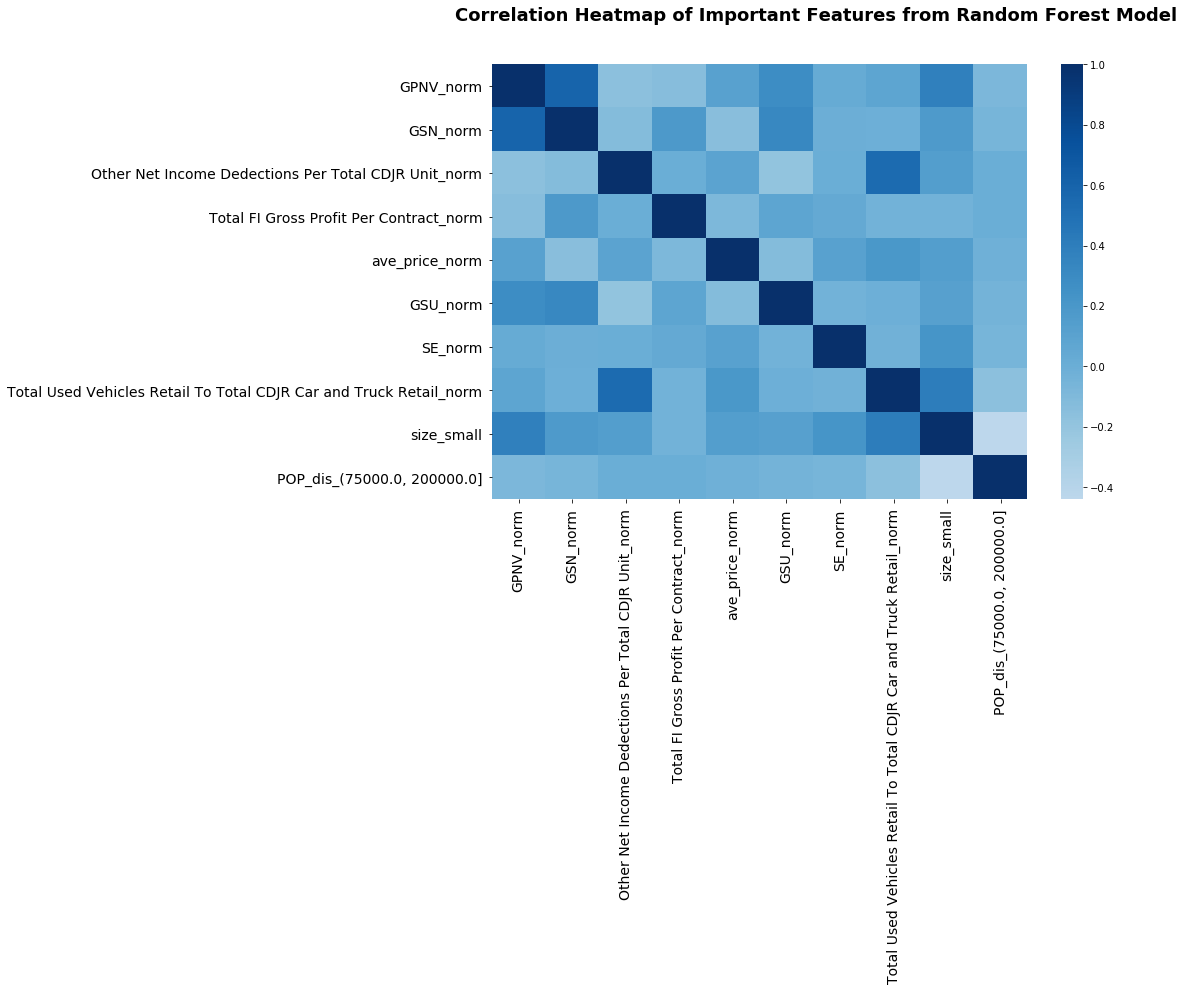

In [37]:
fig, ax = plt.subplots(figsize=(12,8))
fig.suptitle('Correlation Heatmap of Important Features from Random Forest Model' , fontsize = figfont_size , fontweight = 'bold')
sns.heatmap(X_2[X_2.columns[indices_tree[:10]]].corr(), center=0 , cmap = 'Blues')
plt.tick_params(labelsize=ticksize, pad=6)
#ax.set_title(‘Multi-Collinearity of Car Attributes’)

# Random Forest Model with Just Features with High Importance  

In [38]:
############################################################################################################
X_3 = X[X_2.columns[indices_tree[:8]]]

In [39]:
pd.DataFrame(X_3.columns).style

,0
0,GPNV_norm
1,GSN_norm
2,Other Net Income Dedections Per Total CDJR Unit_norm
3,Total FI Gross Profit Per Contract_norm
4,ave_price_norm
5,GSU_norm
6,SE_norm
7,Total Used Vehicles Retail To Total CDJR Car and Truck Retail_norm


In [40]:
regr_3 = RandomForestRegressor()
regr_3.fit(X_3, y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

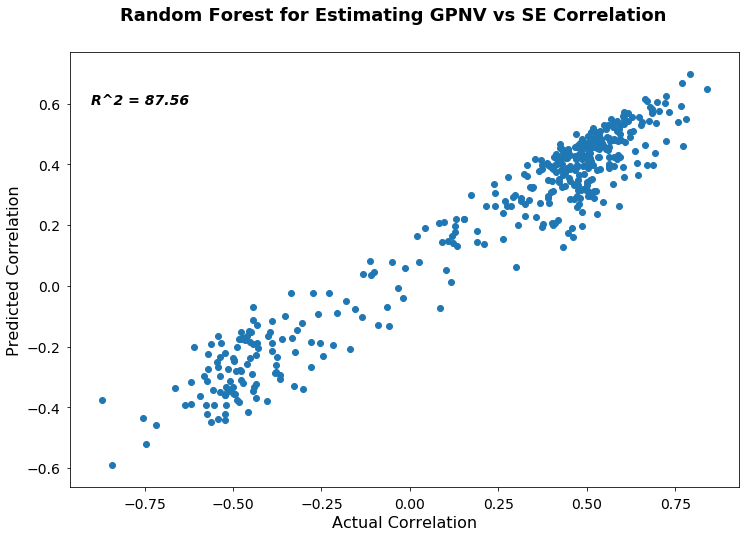

In [41]:
fig= plt.figure(figsize = (12,8))
fig.suptitle('Random Forest for Estimating GPNV vs SE Correlation' , fontsize = figfont_size , y = .96, fontweight = 'bold')
ax = plt.scatter(y , regr_3.predict(X_3))
plt.xlabel('Actual Correlation', fontsize = labelfont_size)
plt.ylabel('Predicted Correlation' , fontsize = labelfont_size)
plt.text ( -.9,.6, 'R^2 = {:.2f}'.format(100*regr_3.score(X_3 , y)) , style = 'italic' , fontsize = 14 , fontweight = 'bold' )
plt.tick_params(labelsize=ticksize, pad=6)

Text(0.5, 0.94, 'Random Forest Feature Importance Analysis')

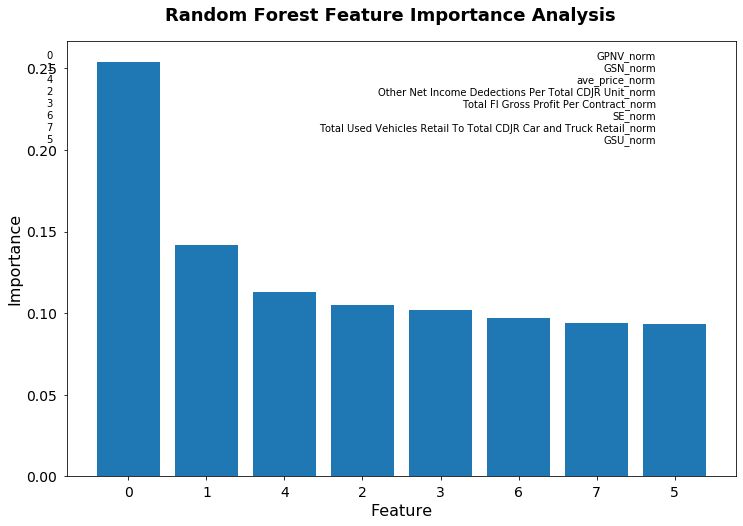

In [42]:
importance = regr_3.feature_importances_
indices_tree = np.argsort(regr_3.feature_importances_)[::-1]
fig= plt.figure(figsize=(12,8))
plt.bar(range(8) , importance[indices_tree])
plt.xticks(range(8), indices_tree)
plt.xlabel('Feature' , fontsize = labelfont_size)
plt.ylabel('Importance', fontsize = labelfont_size)
plt.tick_params(labelsize=ticksize, pad=6)
plt.table(cellText=np.array(pd.DataFrame(X_3.columns[indices_tree] , index = indices_tree)) , loc = 'best' , rowLabels = indices_tree , edges = 'open' )
fig.suptitle('Random Forest Feature Importance Analysis' , fontweight = 'bold' , y=0.94, fontsize = figfont_size)
#fig.savefig('./Proj_2_export/export_graph/RandomForest_default_Removed_Correlation_mannualy_featureanalysis.png')

/Users/hamedniakan/opt/anaconda3/lib/python3.7/site-packages/sklearn/inspection/_partial_dependence.py:715: FutureWarning: The fig parameter is deprecated in version 0.22 and will be removed in version 0.24
  FutureWarning)


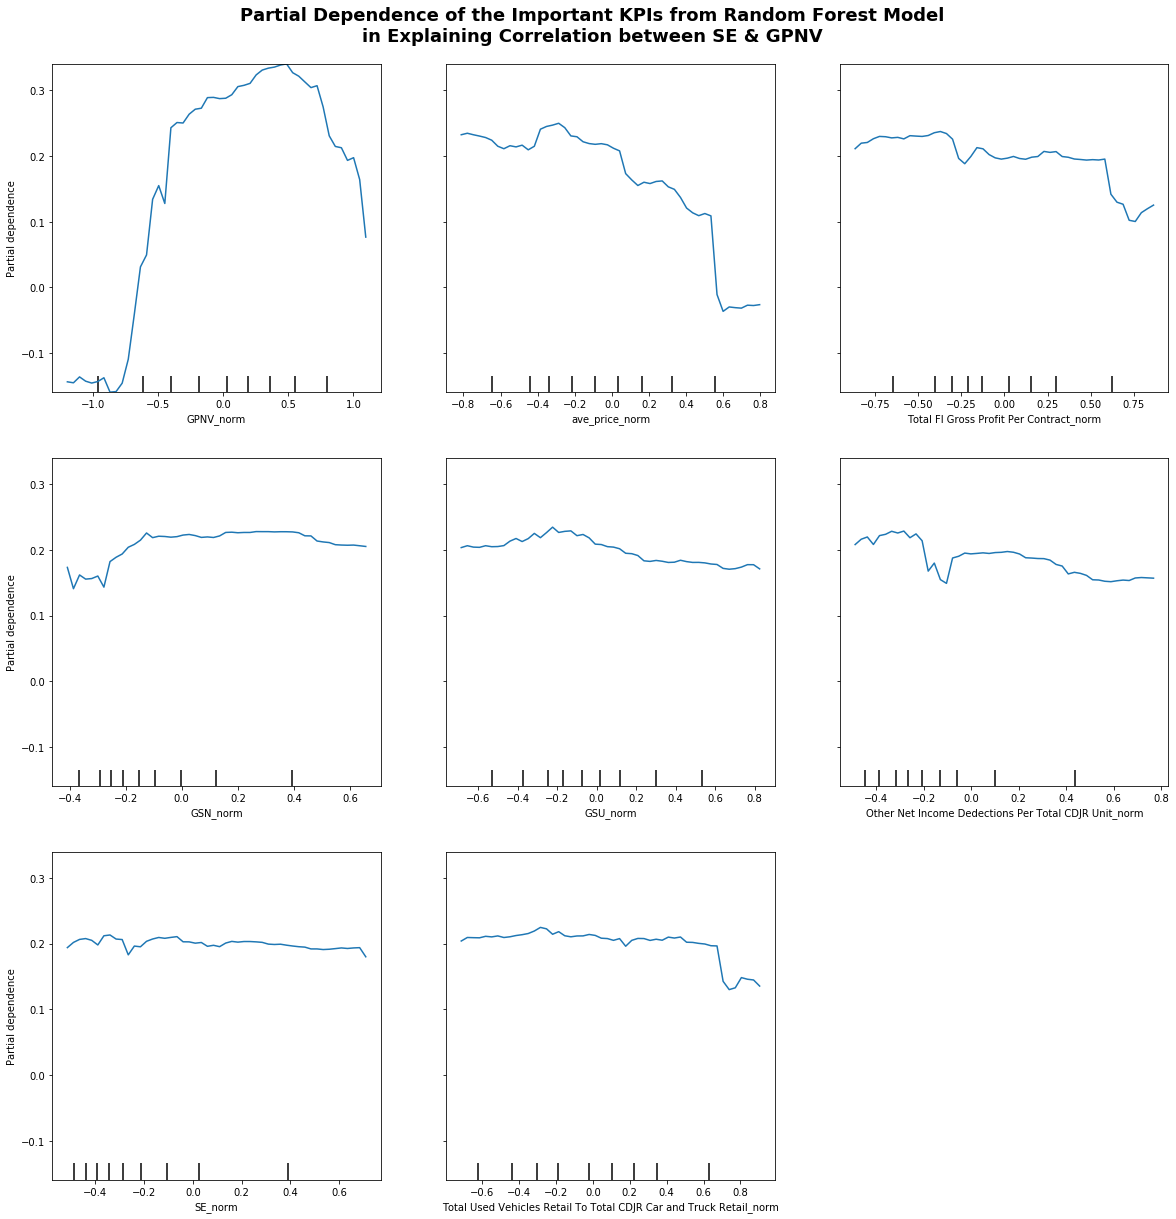

In [43]:
fig = plt.figure(figsize=(20,20))
plot_partial_dependence(regr_3, X_3, indices_tree,n_jobs=3, feature_names=X_2.columns, grid_resolution=50, fig = fig )
fig = plt.gcf()
fig.suptitle('Partial Dependence of the Important KPIs from Random Forest Model\n'
                 'in Explaining Correlation between SE & GPNV', y = .94, fontsize = figfont_size, fontweight = 'bold')
plt.subplots_adjust(top=0.9)
plt.show()
#fig.savefig('./Proj_2_export/export_graph/RandomForest_partial_dependency_plot.png')

# Building Random Forest Model with All Dealerships

In [44]:
df = coef
df.shape

(1653, 91)

In [45]:
X_4 = df[X_2.columns[indices_tree[:8]]]
y = df['correlation']

In [46]:
regr_4 = RandomForestRegressor()
regr_4.fit(X_4, y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

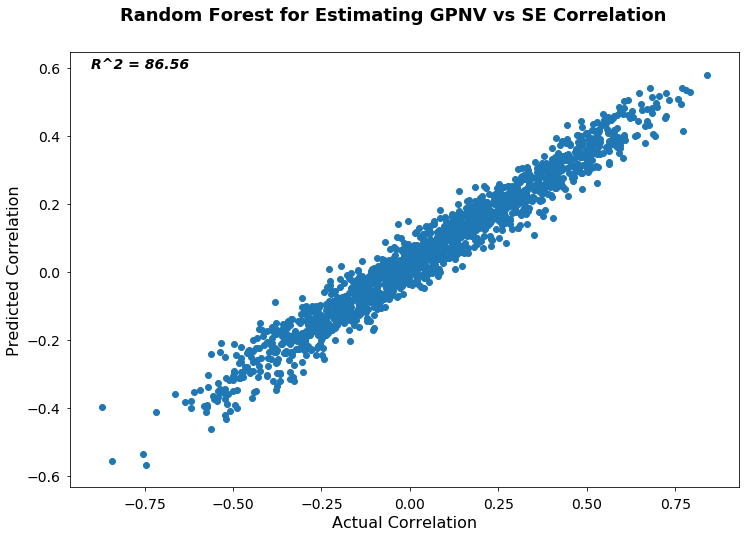

In [47]:
fig= plt.figure(figsize = (12,8))
fig.suptitle('Random Forest for Estimating GPNV vs SE Correlation' , fontsize = figfont_size , y = .96, fontweight = 'bold')
ax = plt.scatter(y , regr_4.predict(X_4))
plt.xlabel('Actual Correlation', fontsize = labelfont_size)
plt.ylabel('Predicted Correlation' , fontsize = labelfont_size)
plt.text ( -.9,.6, 'R^2 = {:.2f}'.format(100*regr_4.score(X_4 , y)) , style = 'italic' , fontsize = 14 , fontweight = 'bold' )
plt.tick_params(labelsize=ticksize, pad=6)

In [48]:
importance = regr_4.feature_importances_
indices_tree = np.argsort(regr_4.feature_importances_)[::-1]

Text(0.5, 0.94, 'Random Forest Feature Importance Analysis')

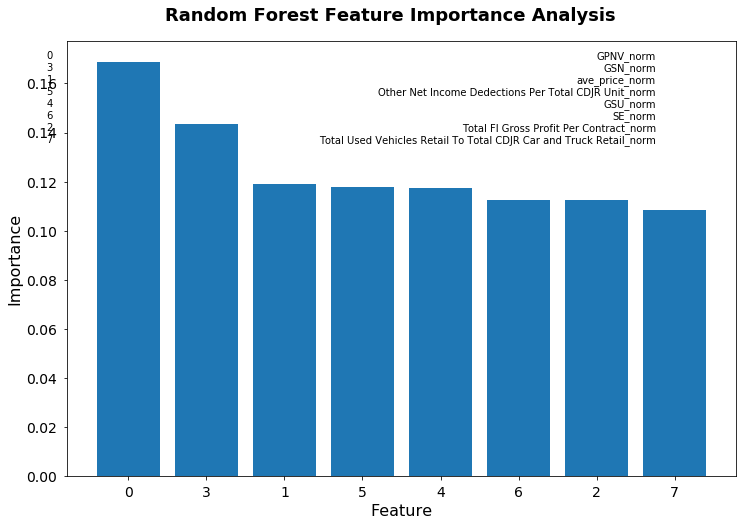

In [49]:
fig= plt.figure(figsize=(12,8))
plt.bar(range(8) , importance[indices_tree])
plt.xticks(range(8), indices_tree[:])
plt.xlabel('Feature' , fontsize = labelfont_size)
plt.ylabel('Importance', fontsize = labelfont_size)
plt.table(cellText=np.array(pd.DataFrame(X_4.columns[indices_tree] , index = indices_tree)) , loc = 'best' , rowLabels = indices_tree , edges = 'open' )
plt.tick_params(labelsize=ticksize, pad=6)
fig.suptitle('Random Forest Feature Importance Analysis' , fontweight = 'bold' , y=0.94, fontsize = figfont_size)
#fig.savefig('./Proj_2_export/export_graph/RandomForest_default_Removed_Correlation_mannualy_featureanalysis.png')

/Users/hamedniakan/opt/anaconda3/lib/python3.7/site-packages/sklearn/inspection/_partial_dependence.py:715: FutureWarning: The fig parameter is deprecated in version 0.22 and will be removed in version 0.24
  FutureWarning)


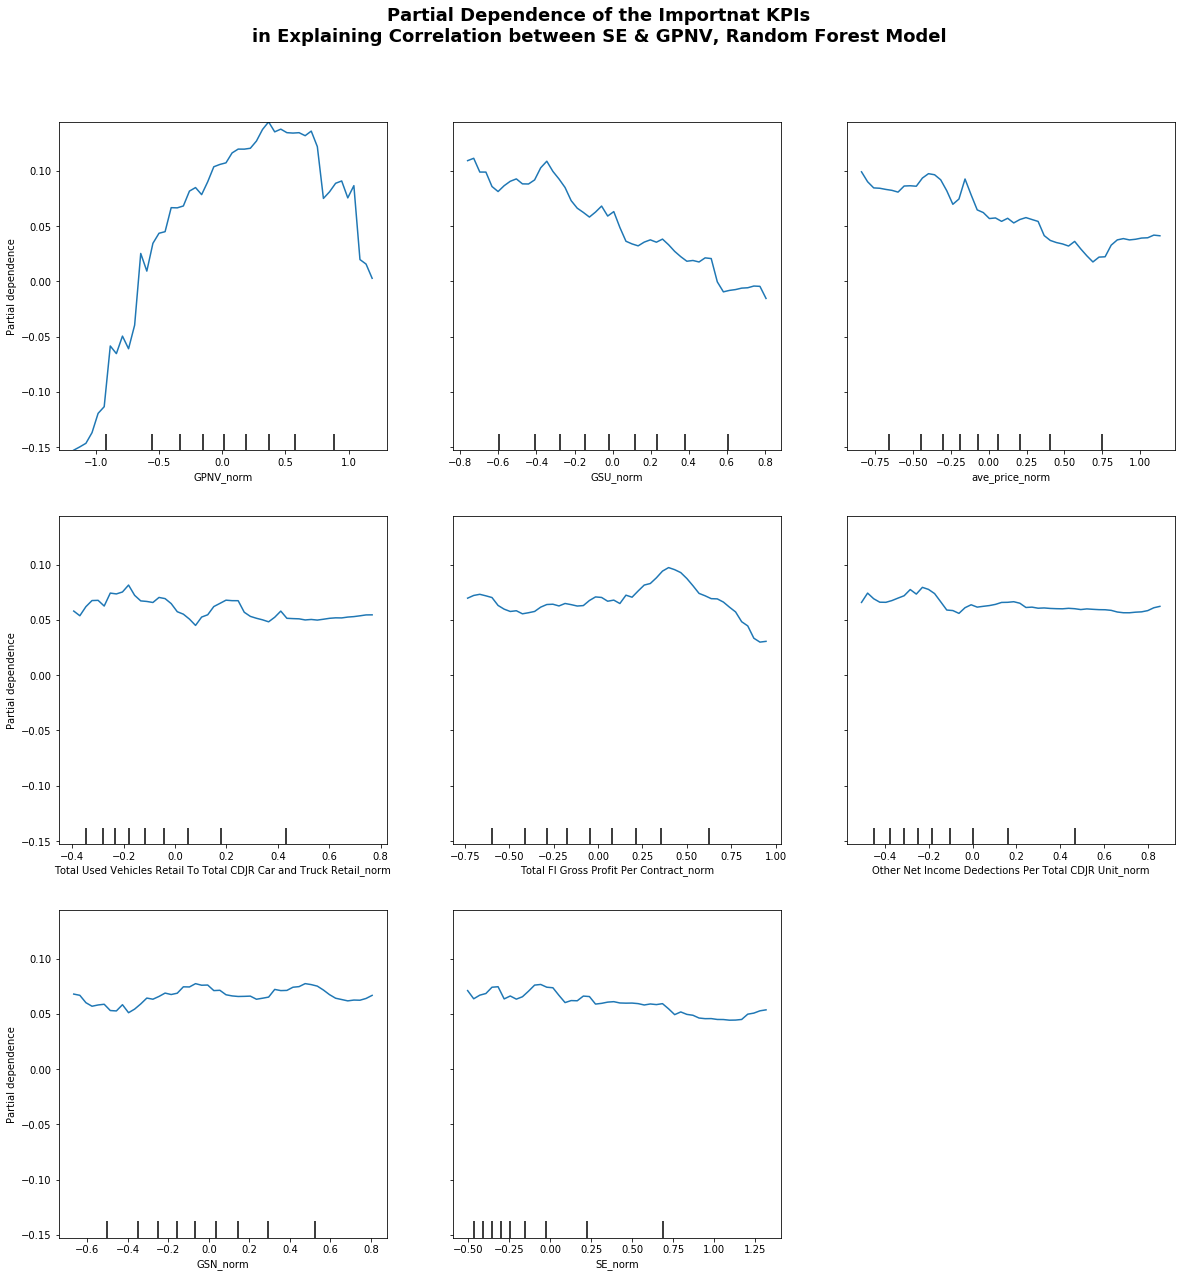

In [50]:
fig = plt.figure(figsize=(20,20))
plot_partial_dependence(regr_4, X_4, indices_tree,n_jobs=3, feature_names=X_2.columns, grid_resolution=50, fig = fig )
fig = plt.gcf()
fig.suptitle('Partial Dependence of the Importnat KPIs\n'
                 'in Explaining Correlation between SE & GPNV, Random Forest Model' , fontsize = figfont_size , fontweight = 'bold')
plt.subplots_adjust(top=0.9)
plt.show()
#fig.savefig('./Proj_2_export/export_graph/RandomForest_partial_dependency_plot.png')

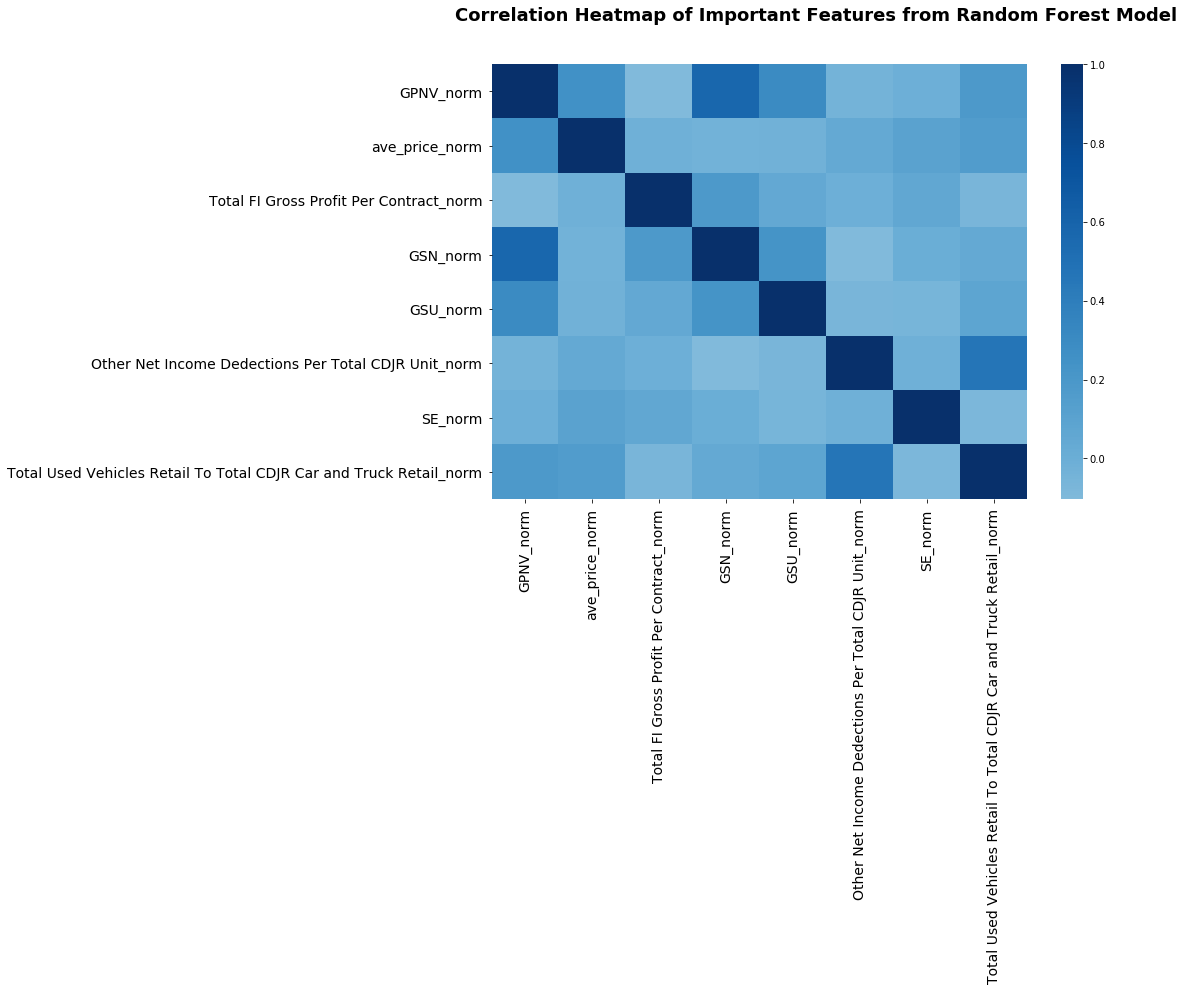

In [51]:
fig, ax = plt.subplots(figsize=(12,8))
fig.suptitle('Correlation Heatmap of Important Features from Random Forest Model' , fontsize = figfont_size , fontweight = 'bold')
sns.heatmap(X_4.corr(), center=0 , cmap = 'Blues')
plt.tick_params(labelsize=ticksize, pad=6)

# Model with Just Demographic Variables & Dealerships with R^2 > .19

In [52]:
df= coef[coef['R2_deg2'] > .19]
X_5 = pd.concat([ pd.get_dummies(df.iloc[:,83:88]) ,pd.get_dummies(df.iloc[:,90])] , axis = 1 , sort = False )
y = df['correlation']

In [53]:
regr_5 = RandomForestRegressor()
regr_5.fit(X_5, y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

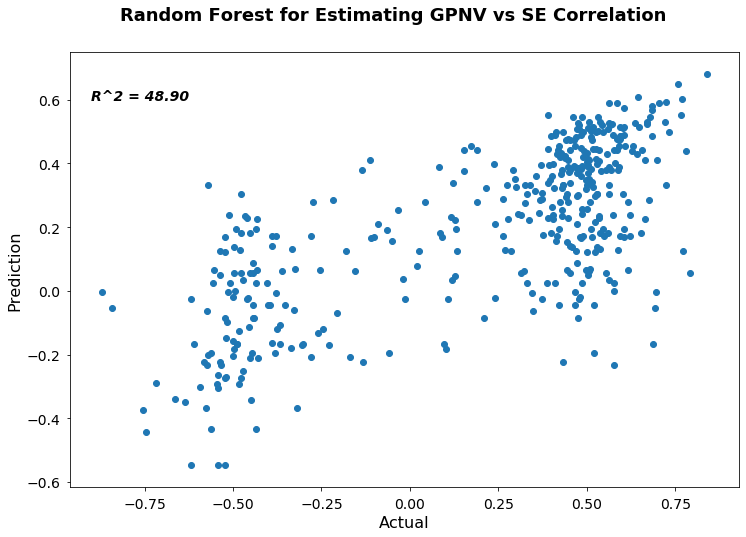

In [54]:
fig= plt.figure(figsize = (12,8))
fig.suptitle('Random Forest for Estimating GPNV vs SE Correlation' , fontsize = figfont_size , y = .96, fontweight = 'bold')
ax = plt.scatter(y , regr_5.predict(X_5))
plt.xlabel('Actual', fontsize = labelfont_size)
plt.ylabel('Prediction' , fontsize = labelfont_size)
plt.text ( -.9,.6, 'R^2 = {:.2f}'.format(100*regr_5.score(X_5 , y)) , style = 'italic' , fontsize = 14 , fontweight = 'bold' )
plt.tick_params(labelsize=ticksize, pad=6)

In [55]:
importance = regr_5.feature_importances_
indices_tree = np.argsort(regr_5.feature_importances_)[::-1]

Text(0.5, 0.94, 'Random Forest Feature Importance Analysis')

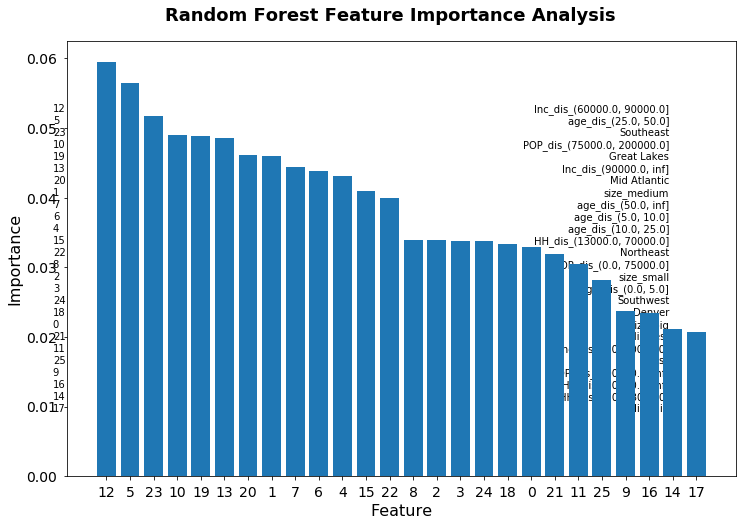

In [56]:
fig= plt.figure(figsize=(12,8))
plt.bar(range(len(indices_tree)) , importance[indices_tree])
plt.xticks(range(len(indices_tree)), indices_tree[:])
plt.xlabel('Feature' , fontsize = labelfont_size)
plt.ylabel('Importance', fontsize = labelfont_size)
plt.table(cellText=np.array(pd.DataFrame(X_5.columns[indices_tree], index = indices_tree)) , loc = 'center' , rowLabels = indices_tree , edges = 'open' )
plt.tick_params(labelsize=ticksize, pad=6)
fig.suptitle('Random Forest Feature Importance Analysis' , fontweight = 'bold' , y=0.94, fontsize = figfont_size)
#fig.savefig('./Proj_2_export/export_graph/RandomForest_default_Removed_Correlation_mannualy_featureanalysis.png')

# Comparison with Purely Random/Dummy Dealer Data

In [57]:
from sklearn.utils import shuffle

In [58]:
###############################################################################################
##                          Generate Synthetic Dealer Data for SE & GPNV ~ N(0,1)
#import random
NumOfObservations = 39
NumOfDealers = 1760

Text(0.5, 70, 'Avg |Corr| = 0.13')

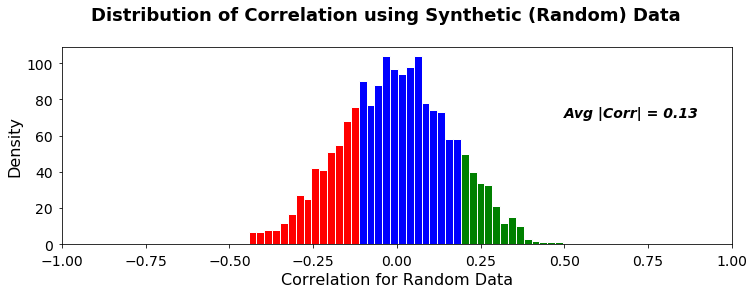

In [59]:
tmpCorrelation = np.zeros(NumOfDealers)
for iDealer in range(1, NumOfDealers):
  tmp = np.random.normal(0, 1, (NumOfObservations, 2))
  #tmp = np.random.rand(NumOfObservations, 2)
  res = np.corrcoef(tmp,rowvar=False)
  tmpCorrelation[iDealer] = res[0,1]
    
###############################################################################################
##                          Plot Correlation of Synthetic Dealer Data for SE & GPNV
fig = plt.figure(figsize = (12,8))
fig.suptitle('Distribution of Correlation using Synthetic (Random) Data' , fontweight = 'bold', fontsize = figfont_size, y = .95)
ax1  = fig.add_subplot(211)
_ , bins, patches = ax1.hist(tmpCorrelation, 40 , edgecolor='white', linewidth=1)
for i in range(0,14): 
    patches[i].set_facecolor('r')
for i in range(14, 27):
    patches[i].set_facecolor('b')
for i in range(27,len(patches) ): 
    patches[i].set_facecolor('g')
ax1.set_xlim(-1,1)
ax1.set_xlabel('Correlation for Random Data' , fontsize = labelfont_size)
ax1.set_ylabel('Density' , fontsize = labelfont_size)
plt.tick_params(labelsize=ticksize, pad=6)
tmpAvgOfAbsCorrelation = np.average(abs(tmpCorrelation))
ax1.text (.5,70, 'Avg |Corr| = {:.2f}'.format(tmpAvgOfAbsCorrelation), style = 'italic' , fontsize = 14 , fontweight = 'bold' )


Text(0.25, 70, 'Avg |R^2| = 0.08')

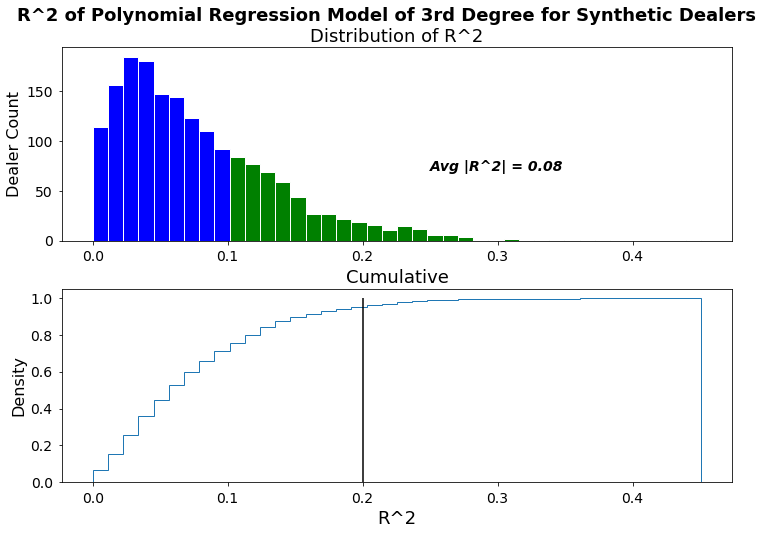

In [60]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

tmpR2 = np.zeros(NumOfDealers)
for iDealer in range(1, NumOfDealers):
  tmp = np.random.normal(0, 1, (NumOfObservations, 2))
  x = tmp[:,0]; y = tmp[:,1];
  # transforming the data to include another axis
  x = x[:, np.newaxis]; y = y[:, np.newaxis]
  polynomial_features= PolynomialFeatures(degree=3)
  x_poly = polynomial_features.fit_transform(x)
  model = LinearRegression()
  model.fit(x_poly, y)
  y_poly_pred = model.predict(x_poly)
  r2 = r2_score(y,y_poly_pred)
  tmpR2[iDealer] = r2

fig = plt.figure(figsize = (12,8))
fig.suptitle('R^2 of Polynomial Regression Model of 3rd Degree for Synthetic Dealers' , fontweight = 'bold' , fontsize = figfont_size , y = .95)
ax1  = fig.add_subplot(211)
_ , bins, patches = ax1.hist(tmpR2, 40 , edgecolor='white', linewidth=1 )
for i in range(0,9): 
    patches[i].set_facecolor('b')
for i in range(9, len(patches)):
    patches[i].set_facecolor('g')
ax1.set_title('Distribution of R^2' , fontsize = titlefont_size) 
ax1.set_ylabel('Dealer Count' , fontsize = labelfont_size)
plt.tick_params(labelsize=ticksize, pad=6)
ax2 = plt.subplot(212 , sharex = ax1 )
ax2.hist(tmpR2, 40 , cumulative=True , histtype = 'step' , density = True)
ax2.vlines(.2, 0 , 1)
ax2.set_title('Cumulative' , fontsize = titlefont_size)
ax2.set_xlabel('R^2', fontsize = titlefont_size)
ax2.set_ylabel('Density' , fontsize = labelfont_size)
plt.tick_params(labelsize=ticksize, pad=6)
plt.subplots_adjust(hspace=.25)
tmpAvgR2 = np.average(tmpR2)
ax1.text (.25,70, 'Avg |R^2| = {:.2f}'.format(tmpAvgR2), style = 'italic' , fontsize = 14 , fontweight = 'bold' )

In [61]:
x = shuffle(pd.Series(np.random.normal(0,1,NumOfObservations * NumOfDealers)))
y = shuffle(pd.Series(np.random.normal(0,1,NumOfObservations * NumOfDealers)))
data = pd.concat([x,y] , axis= 1)
data=shuffle(data)
corr = []

In [62]:
for i in range(NumOfDealers):
    c = data.iloc[i*39:(i+1)*39,:].corr().iloc[0,1]
    corr.append(c)

Text(0, 0.5, 'Avg. Correlation')

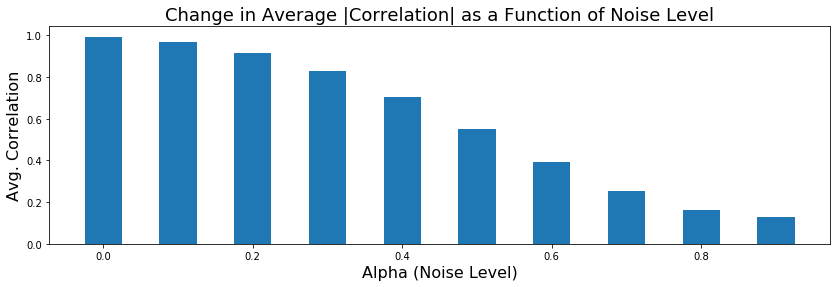

In [63]:
for alpha in np.arange(0,1.1,.1):
    data['z_'+str(alpha)] = (1-alpha)*data[0]+alpha * data[1]
    
mean_corr =[]
for j in range(3, len(data.columns)):
    corr = []
    for i in range(NumOfDealers):
        c = data.iloc[i*39:(i+1)*39,:].corr().iloc[0,j]
        corr.append(c)
    mean_corr.append(np.mean(np.abs(corr)))
    
fig= plt.figure(figsize = (14,4))
plt.title('Change in Average |Correlation| as a Function of Noise Level' , fontsize = titlefont_size)
plt.bar(np.arange(0,1,.1) , mean_corr , width = .05)
plt.xlabel('Alpha (Noise Level)', fontsize = labelfont_size)
plt.ylabel('Avg. Correlation' , fontsize = labelfont_size)

# Building Random Forest Model Usind Dealerships with R^2 > .2 and Spliting data to Test and Train Sets 


In [64]:
#featuers = X_4.columns
features = ['GPNV_norm', 'ave_price_norm',
       'Other Net Income Dedections Per Total CDJR Unit_norm',
       'Total Used Vehicles Retail To Total CDJR Car and Truck Retail_norm',
       'GSN_norm', 'GSU_norm', 'SE_norm',
       'Total FI Gross Profit Per Contract_norm']

In [65]:
coef_train = pd.read_csv('/Users/hamedniakan/Desktop/Hamed/research_urban science /WSU 2019/proj_2_export/export_csv/dealer_coef_train_All_KPI_demo_pattern.csv' )
#coef_train = pd.read_csv('dealer_coef_train_All_KPI_demo_pattern.csv')
coef_test= pd.read_csv('/Users/hamedniakan/Desktop/Hamed/research_urban science /WSU 2019/proj_2_export/export_csv/dealer_coef_test_All_KPI_demo_pattern.csv' )
#coef_test = pd.read_csv('dealer_coef_test_All_KPI_demo_pattern.csv' )


In [66]:
df_train = coef_train[coef_train['R2_deg2']> .19]
df_test = coef_test[coef_test['R2_deg2']> .19]

In [67]:
X_test = df_test[features]
y_test = df_test['correlation']
X_train = df_train[features]
y_train = df_train['correlation']

In [68]:
regr_6 = RandomForestRegressor()
regr_6.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

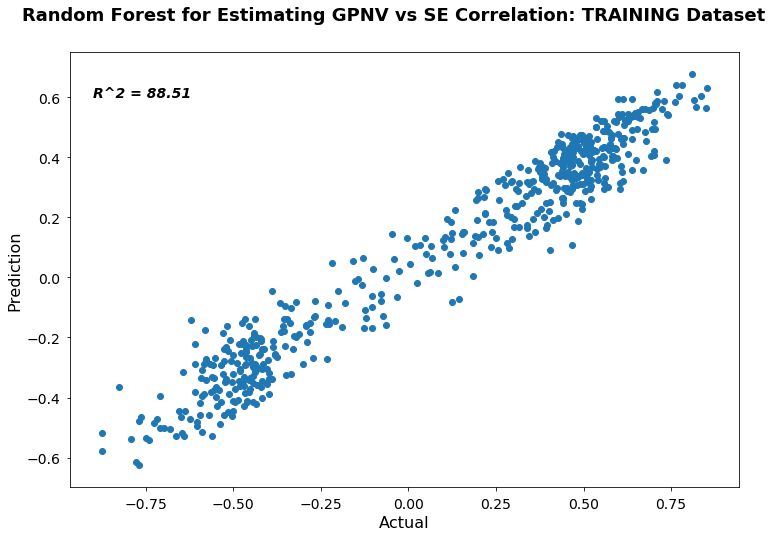

In [69]:
fig= plt.figure(figsize = (12,8))
fig.suptitle('Random Forest for Estimating GPNV vs SE Correlation: TRAINING Dataset' , fontsize = figfont_size , y = .96, fontweight = 'bold')
ax = plt.scatter(y_train , regr_6.predict(X_train))
plt.xlabel('Actual', fontsize = labelfont_size)
plt.ylabel('Prediction' , fontsize = labelfont_size)
plt.text ( -.9,.6, 'R^2 = {:.2f}'.format(100*regr_6.score(X_train , y_train)) , style = 'italic' , fontsize = 14 , fontweight = 'bold' )
plt.tick_params(labelsize=ticksize, pad=6)

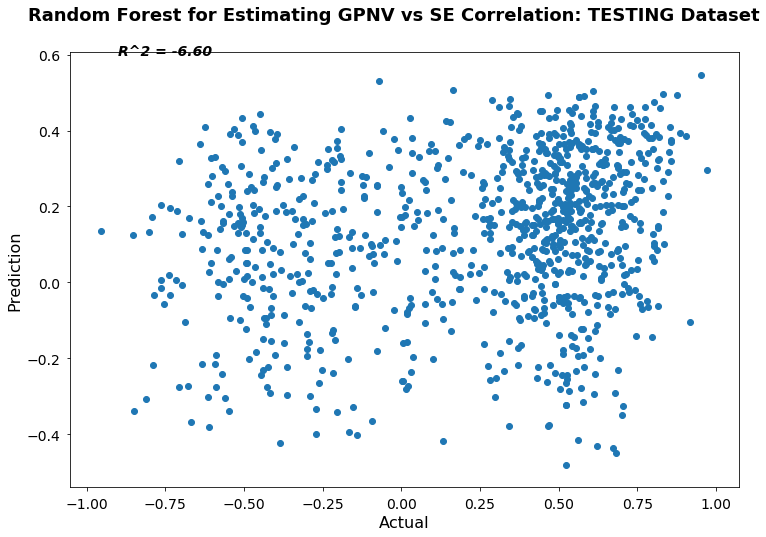

In [70]:
fig= plt.figure(figsize = (12,8))
fig.suptitle('Random Forest for Estimating GPNV vs SE Correlation: TESTING Dataset' , fontsize = figfont_size , y = .96, fontweight = 'bold')
ax = plt.scatter(y_test , regr_6.predict(X_test))
plt.xlabel('Actual', fontsize = labelfont_size)
plt.ylabel('Prediction' , fontsize = labelfont_size)
plt.text ( -.9,.6, 'R^2 = {:.2f}'.format(100*regr_6.score(X_test , y_test)) , style = 'italic' , fontsize = 14 , fontweight = 'bold' )
plt.tick_params(labelsize=ticksize, pad=6)

# Analysis of Differences Between Test and Train Datasets 

Text(0.5, 60, 'Avg |Corr| = 0.34')

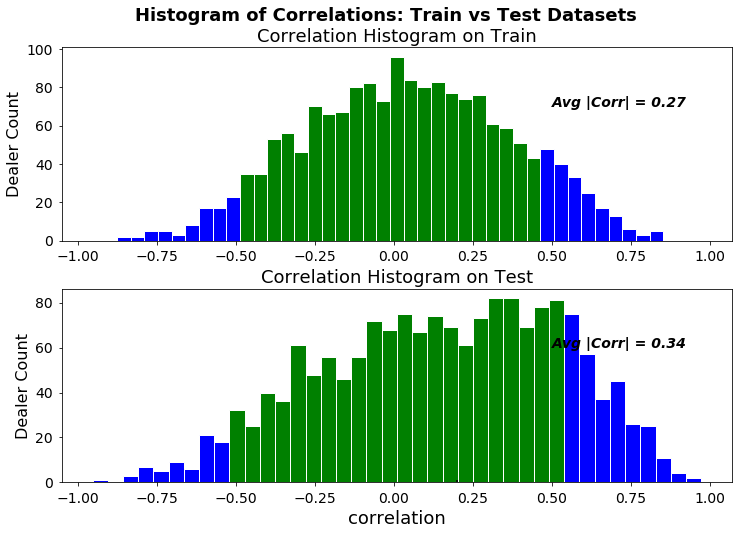

In [71]:
fig = plt.figure(figsize = (12,8))
fig.suptitle('Histogram of Correlations: Train vs Test Datasets' , fontweight = 'bold' , fontsize = figfont_size , y = .95)
ax1  = fig.add_subplot(211)
_ , bins, patches = ax1.hist(coef_train['correlation'], 40 , edgecolor='white', linewidth=1 )
for i in range(0,9): 
    patches[i].set_facecolor('b')
for i in range(9, 31):
    patches[i].set_facecolor('g')
for i in range(31, 40):
    patches[i].set_facecolor('b')
ax1.set_title('Correlation Histogram on Train' , fontsize = titlefont_size) 
ax1.set_ylabel('Dealer Count' , fontsize = labelfont_size)
plt.tick_params(labelsize=ticksize, pad=6)
tmpAvgOfAbsCorrelation = np.average(abs(coef_train['correlation']))
ax1.text (.5,70, 'Avg |Corr| = {:.2f}'.format(tmpAvgOfAbsCorrelation), style = 'italic' , fontsize = 14 , fontweight = 'bold' )

ax2 = plt.subplot(212 , sharex = ax1 )
_ , bins, patches = ax2.hist(coef_test['correlation'], 40 ,edgecolor='white', linewidth=1 )
for i in range(0,9): 
    patches[i].set_facecolor('b')
for i in range(9, 31):
    patches[i].set_facecolor('g')
for i in range(31, 40):
    patches[i].set_facecolor('b')
ax2.vlines(.2, 0 , 1)
ax2.set_title('Correlation Histogram on Test' , fontsize = titlefont_size)
ax2.set_xlabel('correlation', fontsize = titlefont_size)
ax2.set_ylabel('Dealer Count' , fontsize = labelfont_size)
plt.tick_params(labelsize=ticksize, pad=6)
plt.subplots_adjust(hspace=.25)
tmpAvgOfAbsCorrelation = np.average(abs(coef_test['correlation']))
ax2.text (.5,60, 'Avg |Corr| = {:.2f}'.format(tmpAvgOfAbsCorrelation), style = 'italic' , fontsize = 14 , fontweight = 'bold' )

In [72]:
train_test_corr = pd.merge(coef_train[['dealer' , 'correlation']] , coef_test[['dealer' , 'correlation']] , on = 'dealer' , how = 'inner')

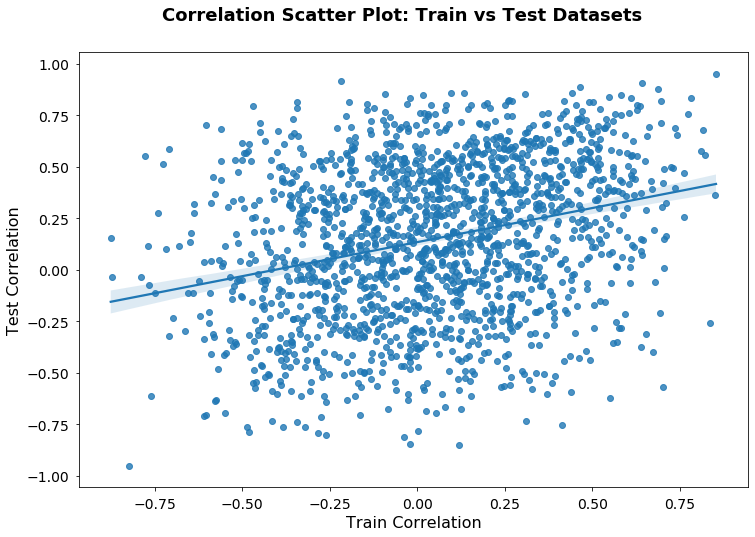

In [73]:
fig= plt.figure(figsize = (12,8))
fig.suptitle('Correlation Scatter Plot: Train vs Test Datasets' , fontsize = figfont_size , y = .96, fontweight = 'bold')
ax = ax = sns.regplot(x=train_test_corr['correlation_x'], y=train_test_corr['correlation_y'], marker="o")
plt.xlabel('Train Correlation', fontsize = labelfont_size)
plt.ylabel('Test Correlation' , fontsize = labelfont_size)
plt.tick_params(labelsize=ticksize, pad=6)

# if the dealer's behavior consistent over time !!!

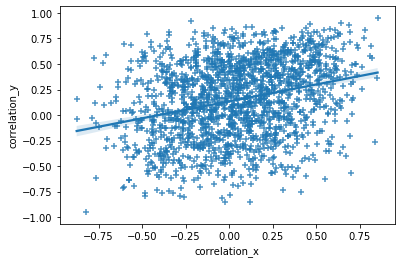

In [74]:
ax = sns.regplot(x=train_test_corr['correlation_x'], y=train_test_corr['correlation_y'], marker="+")

# Scatter Plot of Trainset vs Testset Points for Analysis of Coverage Overlap

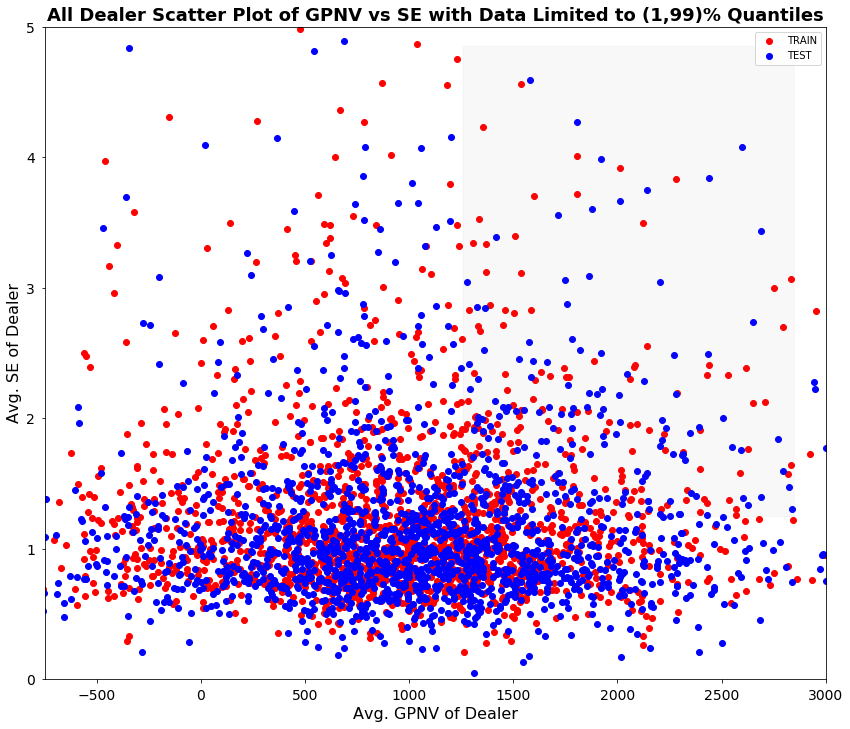

In [75]:
fig= plt.figure(figsize = (14,12))  
ax = plt.scatter(coef_train['GPNV'] , coef_train['SE'] , c = 'r' ,label = 'TRAIN') 
plt.scatter(coef_test['GPNV'] , coef_test['SE'] , c = 'b' ,label = 'TEST') 
plt.xlabel('Avg. GPNV of Dealer' , fontsize = labelfont_size)
plt.ylabel('Avg. SE of Dealer' , fontsize = labelfont_size)
plt.title('All Dealer Scatter Plot of GPNV vs SE with Data Limited to (1,99)% Quantiles' , fontweight = 'bold' , fontsize = figfont_size)
#plt.axvspan(coef['GP_clip'].quantile(.66), coef['GP_clip'].max(), facecolor='0.2', alpha=0.5)
#plt.axhspan(coef['SE_clip'].quantile(.66), coef['SE_clip'].max(), facecolor='0.2', alpha=0.5)
plt.fill_between(np.arange(coef['GPNV'].quantile(.66) , coef['GPNV'].max() , .01), 
                 coef['SE'].quantile(.66), coef['SE'].max(), color='grey', alpha='0.05')
plt.ylim(0,5)
plt.xlim(-750,3000)
plt.legend()
plt.tick_params(labelsize=ticksize, pad=6)
#cbar_ax = fig.add_axes([.93, 0.12, 0.03, 0.76])
#cbar = fig.colorbar(ax, cax=cbar_ax)
#cbar.set_label('R^2 between GPNV and SE for Individual Dealers', fontsize = labelfont_size)

In [76]:
fca_distance = pd.read_pickle('/Users/hamedniakan/Desktop/Hamed/research_urban science /WSU 2019/fca_distance_agg.pkl')

In [77]:
fca_distance.columns

Index(['dealer', 'rank', 'industry_rank', 'distance', 'drivedistance',
       'WGT_outshr_ALL_10', 'WGT_outshr_ALL_30', 'WGT_outshr_COMpet1_10',
       'WGT_outshr_COMpet1_30', 'WGT_outshr_COMpet2_10',
       'WGT_outshr_COMpet2_30', 'outshr_ALL_10', 'outshr_ALL_30',
       'outshr_COMpet1_10', 'outshr_COMpet1_30', 'outshr_COMpet2_10',
       'outshr_COMpet2_30', 'net_CLOSER_COMPET1SAME', 'net_CLOSER_COMPET1p150',
       'net_CLOSER_COMPET2SAME', 'net_CLOSER_COMPET2p150',
       'net_CLOSER_COMPETALLSAME', 'net_CLOSER_COMPETALLp150',
       'net_CLOSER_WGTCOMPET1SAME', 'net_CLOSER_WGTCOMPET1p150',
       'net_CLOSER_WGTCOMPET2SAME', 'net_CLOSER_WGTCOMPET2p150',
       'net_CLOSER_WGTCOMPETALLSAME', 'net_CLOSER_WGTCOMPETALLp150'],
      dtype='object')

In [78]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [79]:
fca_distance.dropna(axis=0 , inplace=True)

In [80]:
fca_distance.iloc[:,1:] = StandardScaler().fit_transform(fca_distance.iloc[:,1:])


In [81]:
df_train_dis = pd.merge(df_train, fca_distance, how='inner', on = 'dealer' ,
         left_index=False, right_index=False , copy=True, indicator=False,
         validate=None)
df_test_dis = pd.merge(df_test, fca_distance, how='inner', on = 'dealer' ,
         left_index=False, right_index=False , copy=True, indicator=False,
         validate=None)

In [82]:
rank= ['rank','industry_rank']

distance = ['distance', 'drivedistance']

wgt = ['WGT_outshr_ALL_10' , 'WGT_outshr_ALL_30' , 'WGT_outshr_COMpet1_10' , 'WGT_outshr_COMpet1_30' , 
    'WGT_outshr_COMpet2_10' , 'WGT_outshr_COMpet2_30' , 'outshr_ALL_10' , 'outshr_ALL_30' , 'outshr_COMpet1_10' ,
    'outshr_COMpet1_30' , 'outshr_COMpet2_10', 'outshr_COMpet2_30' ]

net = ['net_CLOSER_COMPET1SAME' , 'net_CLOSER_COMPET1p150' , 'net_CLOSER_COMPET2SAME' , 'net_CLOSER_COMPET2p150',
       'net_CLOSER_COMPETALLSAME' , 'net_CLOSER_COMPETALLp150' , 
       'net_CLOSER_WGTCOMPET1SAME' , 'net_CLOSER_WGTCOMPET1p150' , 
       'net_CLOSER_WGTCOMPET2SAME' , 'net_CLOSER_WGTCOMPET2p150' , 
       'net_CLOSER_WGTCOMPETALLSAME' , 'net_CLOSER_WGTCOMPETALLp150' ] 

In [83]:
def best_predictor(df , features_list):
    lr = linear_model.Lasso(alpha=0.1)
    lr.fit(df[features_list] , df['correlation'])
    index = np.argmax(lr.coef_)
    # R square for each 
    return features_list[index]
    

In [84]:
for each in [rank , distance , wgt , net]:
    features.append(best_predictor(df_train_dis , each))

In [85]:
features

['GPNV_norm',
 'ave_price_norm',
 'Other Net Income Dedections Per Total CDJR Unit_norm',
 'Total Used Vehicles Retail To Total CDJR Car and Truck Retail_norm',
 'GSN_norm',
 'GSU_norm',
 'SE_norm',
 'Total FI Gross Profit Per Contract_norm',
 'rank',
 'distance',
 'WGT_outshr_ALL_10',
 'net_CLOSER_COMPET1SAME']

In [86]:
X_test = df_test_dis[features]
y_test = df_test_dis['correlation']
X_train = df_train_dis[features]
y_train = df_train_dis['correlation']

In [87]:
regr_dis = RandomForestRegressor()
regr_dis.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

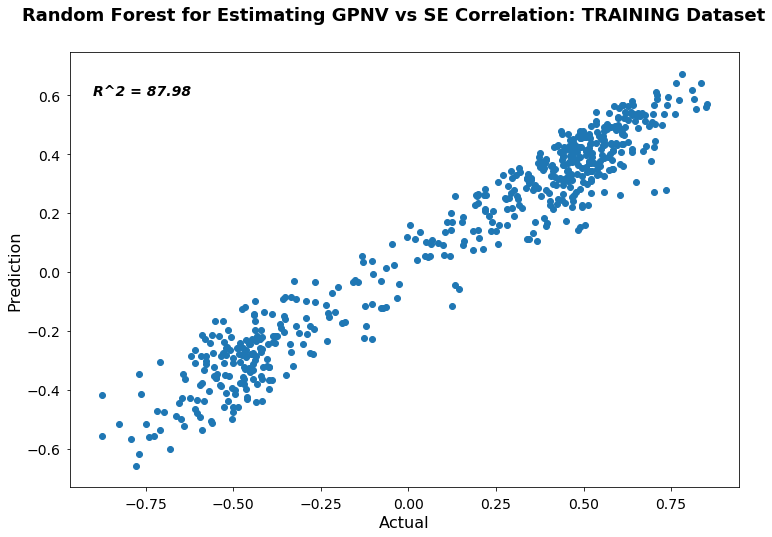

In [88]:
fig= plt.figure(figsize = (12,8))
fig.suptitle('Random Forest for Estimating GPNV vs SE Correlation: TRAINING Dataset' , fontsize = figfont_size , y = .96, fontweight = 'bold')
ax = plt.scatter(y_train , regr_dis.predict(X_train))
plt.xlabel('Actual', fontsize = labelfont_size)
plt.ylabel('Prediction' , fontsize = labelfont_size)
plt.text ( -.9,.6, 'R^2 = {:.2f}'.format(100*regr_dis.score(X_train , y_train)) , style = 'italic' , fontsize = 14 , fontweight = 'bold' )
plt.tick_params(labelsize=ticksize, pad=6)

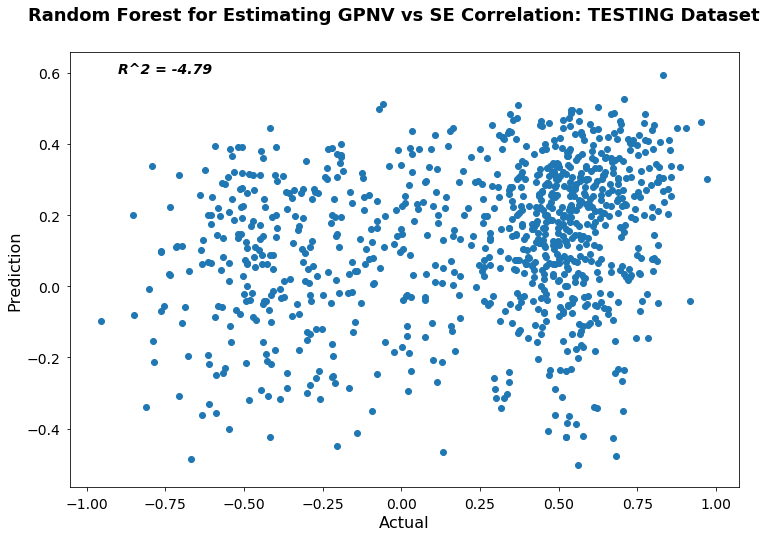

In [89]:
fig= plt.figure(figsize = (12,8))
fig.suptitle('Random Forest for Estimating GPNV vs SE Correlation: TESTING Dataset' , fontsize = figfont_size , y = .96, fontweight = 'bold')
ax = plt.scatter(y_test , regr_dis.predict(X_test))
plt.xlabel('Actual', fontsize = labelfont_size)
plt.ylabel('Prediction' , fontsize = labelfont_size)
plt.text ( -.9,.6, 'R^2 = {:.2f}'.format(100*regr_dis.score(X_test , y_test)) , style = 'italic' , fontsize = 14 , fontweight = 'bold' )
plt.tick_params(labelsize=ticksize, pad=6)

In [90]:
X_test.columns

Index(['GPNV_norm', 'ave_price_norm',
       'Other Net Income Dedections Per Total CDJR Unit_norm',
       'Total Used Vehicles Retail To Total CDJR Car and Truck Retail_norm',
       'GSN_norm', 'GSU_norm', 'SE_norm',
       'Total FI Gross Profit Per Contract_norm', 'rank', 'distance',
       'WGT_outshr_ALL_10', 'net_CLOSER_COMPET1SAME'],
      dtype='object')

# NEW APPROACH USING MORE GRANULAR DATASET ; CREATING 3 DATAPOINTS PER DEALEAR FROM THEIR 12 MONTHs RECORDS  

In [91]:
coef_revised = pd.read_csv('/Users/hamedniakan/Desktop/Hamed/research_urban science /WSU 2019/proj_2_export/export_csv/dealer_coef_All_KPI_demo_discretized_pattern_revised.csv')

# NOTE IT DOES NOT HAVE 'binary_corr', 'state', 'region' 

In [92]:
# MERGE COEF WITH DISTANCE INFO 

coef_revised_dis = pd.merge(coef_revised, fca_distance, how='inner', on = 'dealer' ,
         left_index=False, right_index=False , copy=True, indicator=False,
         validate=None)

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
df = coef_revised_dis

In [95]:
index_1 = df.columns.get_loc('GPNV_norm')
index_2 = df.columns.get_loc('dealer_size_norm')
X_nn = pd.concat([df.iloc[:,index_1:index_2], pd.get_dummies(df.iloc[:,84:88]), pd.get_dummies(df.iloc[:,89:])], axis = 1 , sort = False )
y_nn = df['correlation']


In [96]:
X_train, X_test, y_train, y_test = train_test_split(
    X_nn, y_nn, test_size=0.33, random_state=42)

In [97]:
from sklearn.neural_network import MLPRegressor


In [98]:
model = MLPRegressor (hidden_layer_sizes=(4 ,) , validation_fraction = .2 , early_stopping = True , verbose= True )

In [99]:
model.fit(X_train , y_train )

Iteration 1, loss = 0.55204567
Validation score: -4.063046
Iteration 2, loss = 0.31911967
Validation score: -2.557719
Iteration 3, loss = 0.22307975
Validation score: -1.971815
Iteration 4, loss = 0.17738513
Validation score: -1.519946
Iteration 5, loss = 0.15053777
Validation score: -1.237088
Iteration 6, loss = 0.13578084
Validation score: -1.019770
Iteration 7, loss = 0.12614285
Validation score: -0.842786
Iteration 8, loss = 0.11793940
Validation score: -0.735164
Iteration 9, loss = 0.11257103
Validation score: -0.623839
Iteration 10, loss = 0.10749662
Validation score: -0.536342
Iteration 11, loss = 0.10342058
Validation score: -0.459898
Iteration 12, loss = 0.09998042
Validation score: -0.395999
Iteration 13, loss = 0.09709018
Validation score: -0.348032
Iteration 14, loss = 0.09482974
Validation score: -0.302589
Iteration 15, loss = 0.09260998
Validation score: -0.259987
Iteration 16, loss = 0.09078415
Validation score: -0.214903
Iteration 17, loss = 0.08879814
Validation score:

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=True, epsilon=1e-08,
             hidden_layer_sizes=(4,), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.2, verbose=True,
             warm_start=False)

In [100]:
R_2 = model.score(X_test, y_test)

In [101]:
y_predict = model.predict(X_test)

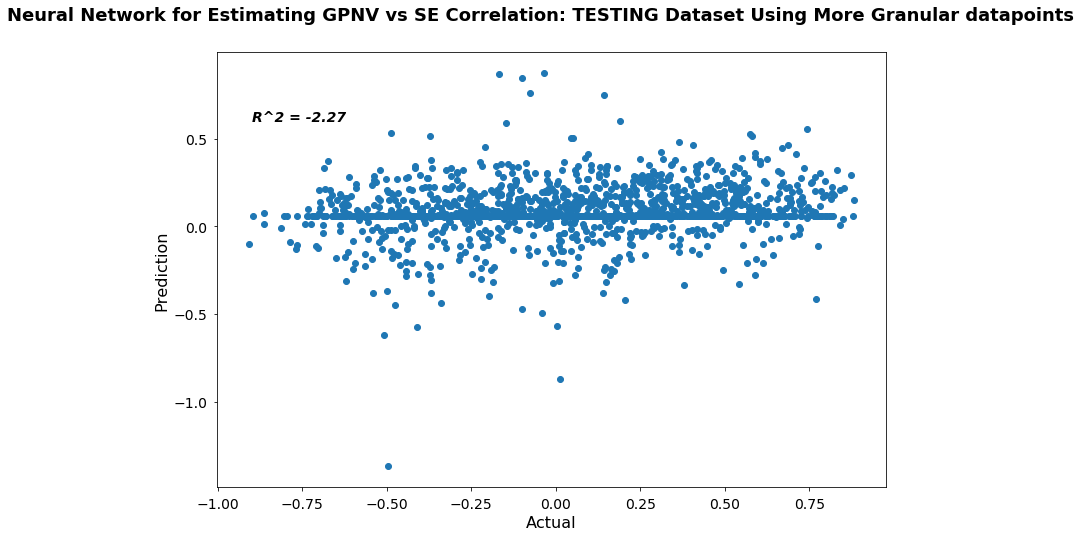

In [102]:
fig= plt.figure(figsize = (12,8))
fig.suptitle('Neural Network for Estimating GPNV vs SE Correlation: TESTING Dataset Using More Granular datapoints' , fontsize = figfont_size , y = .96, fontweight = 'bold')
ax = plt.scatter(y_test , y_predict)
plt.xlabel('Actual', fontsize = labelfont_size)
plt.ylabel('Prediction' , fontsize = labelfont_size)
plt.text ( -.9,.6, 'R^2 = {:.2f}'.format(100*R_2) , style = 'italic' , fontsize = 14 , fontweight = 'bold' )
plt.tick_params(labelsize=ticksize, pad=6)

# Filtering data to R2> .2 and redo the proceduer 

In [103]:
df = coef_revised_dis[coef_revised_dis['R2_deg2']> .19]

Iteration 1, loss = 0.48435779
Validation score: -4.055940
Iteration 2, loss = 0.36698160
Validation score: -2.882331
Iteration 3, loss = 0.29715393
Validation score: -2.130864
Iteration 4, loss = 0.24949107
Validation score: -1.632165
Iteration 5, loss = 0.21997803
Validation score: -1.286887
Iteration 6, loss = 0.20110061
Validation score: -1.051889
Iteration 7, loss = 0.18491877
Validation score: -0.875191
Iteration 8, loss = 0.17321117
Validation score: -0.747735
Iteration 9, loss = 0.16443296
Validation score: -0.641817
Iteration 10, loss = 0.15635885
Validation score: -0.556398
Iteration 11, loss = 0.14954362
Validation score: -0.495862
Iteration 12, loss = 0.14414565
Validation score: -0.447436
Iteration 13, loss = 0.13940767
Validation score: -0.412313
Iteration 14, loss = 0.13540970
Validation score: -0.381910
Iteration 15, loss = 0.13186608
Validation score: -0.359031
Iteration 16, loss = 0.12897248
Validation score: -0.339016
Iteration 17, loss = 0.12632202
Validation score:

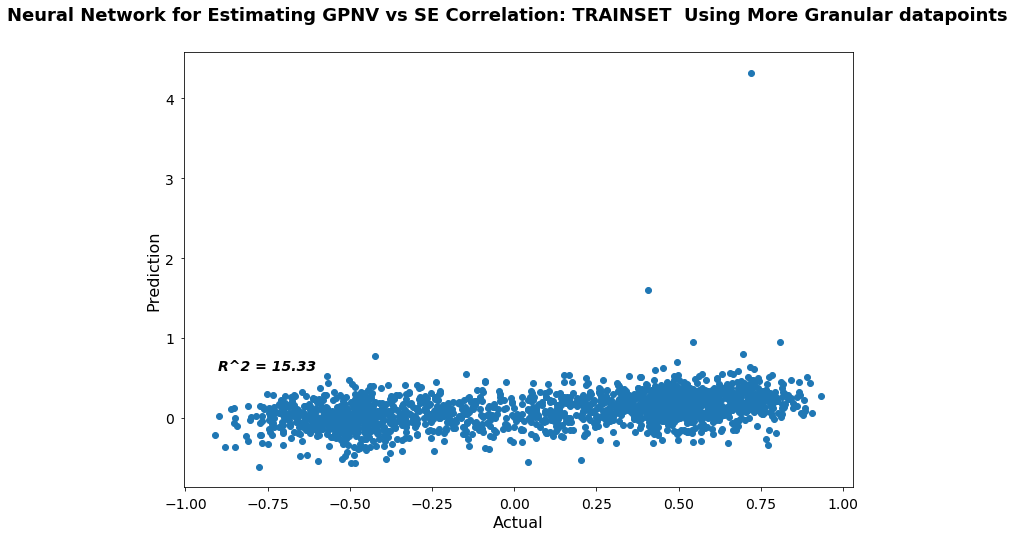

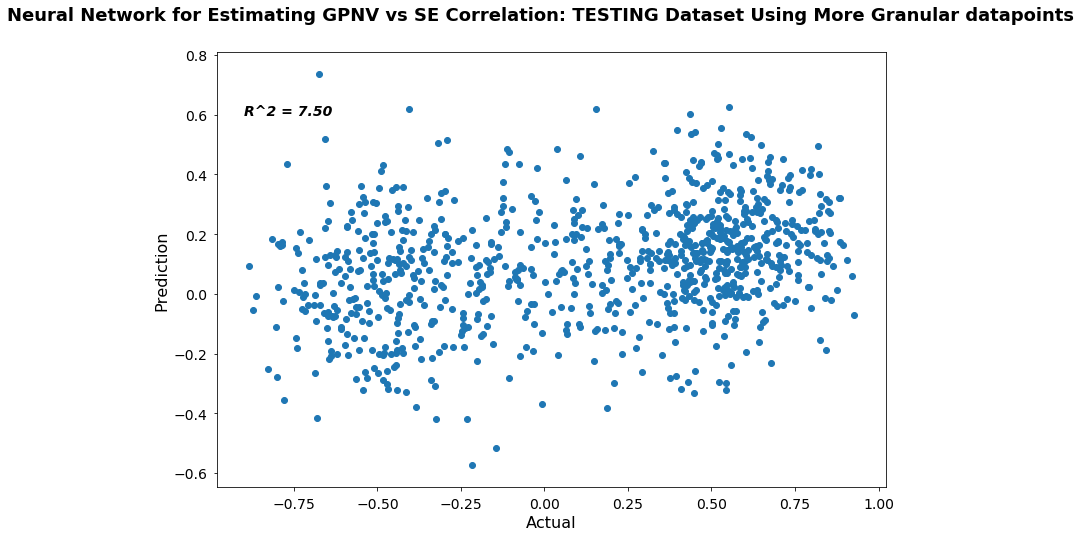

In [104]:
index_1 = df.columns.get_loc('GPNV_norm')
index_2 = df.columns.get_loc('dealer_size_norm')
X_nn = pd.concat([df.iloc[:,index_1:index_2], pd.get_dummies(df.iloc[:,84:88]), pd.get_dummies(df.iloc[:,89:])], axis = 1 , sort = False )
y_nn = df['correlation']
X_train, X_test, y_train, y_test = train_test_split(
    X_nn, y_nn, test_size=0.33, random_state=42)
model = MLPRegressor (hidden_layer_sizes=(8 ,) , validation_fraction = .2 , early_stopping = True , verbose= True )
model.fit(X_train , y_train )
R_2 = model.score(X_test, y_test)
y_predict = model.predict(X_test)
fig= plt.figure(figsize = (12,8))
fig.suptitle('Neural Network for Estimating GPNV vs SE Correlation: TRAINSET  Using More Granular datapoints' , fontsize = figfont_size , y = .96, fontweight = 'bold')
ax = plt.scatter(y_train , model.predict(X_train))
plt.xlabel('Actual', fontsize = labelfont_size)
plt.ylabel('Prediction' , fontsize = labelfont_size)
plt.text ( -.9,.6, 'R^2 = {:.2f}'.format(100*model.score(X_train, y_train)) , style = 'italic' , fontsize = 14 , fontweight = 'bold' )
plt.tick_params(labelsize=ticksize, pad=6)
fig= plt.figure(figsize = (12,8))
fig.suptitle('Neural Network for Estimating GPNV vs SE Correlation: TESTING Dataset Using More Granular datapoints' , fontsize = figfont_size , y = .96, fontweight = 'bold')
ax = plt.scatter(y_test , y_predict)
plt.xlabel('Actual', fontsize = labelfont_size)
plt.ylabel('Prediction' , fontsize = labelfont_size)
plt.text ( -.9,.6, 'R^2 = {:.2f}'.format(100*R_2) , style = 'italic' , fontsize = 14 , fontweight = 'bold' )
plt.tick_params(labelsize=ticksize, pad=6)

# Neural Network Using Important features from RANDOM FOREST NAD R2 > >2

In [105]:
for each in [rank , distance , wgt , net]:
    features.append(best_predictor(coef_revised_dis , each))

In [106]:
df = coef_revised_dis[coef_revised_dis['R2_deg2']> .19]

In [107]:
df.columns

Index(['dealer', '#ofrecords', 'correlation', 'radius_scaled', 'radius', 'B0',
       'B1', 'B2', 'R2_deg2', 'C0',
       ...
       'net_CLOSER_COMPET2SAME', 'net_CLOSER_COMPET2p150',
       'net_CLOSER_COMPETALLSAME', 'net_CLOSER_COMPETALLp150',
       'net_CLOSER_WGTCOMPET1SAME', 'net_CLOSER_WGTCOMPET1p150',
       'net_CLOSER_WGTCOMPET2SAME', 'net_CLOSER_WGTCOMPET2p150',
       'net_CLOSER_WGTCOMPETALLSAME', 'net_CLOSER_WGTCOMPETALLp150'],
      dtype='object', length=118)

Iteration 1, loss = 0.69943730
Validation score: -7.615131
Iteration 2, loss = 0.60720258
Validation score: -6.632274
Iteration 3, loss = 0.53203934
Validation score: -5.792464
Iteration 4, loss = 0.46941287
Validation score: -5.097642
Iteration 5, loss = 0.42022186
Validation score: -4.504951
Iteration 6, loss = 0.37879004
Validation score: -4.013604
Iteration 7, loss = 0.34620229
Validation score: -3.590942
Iteration 8, loss = 0.31778991
Validation score: -3.225397
Iteration 9, loss = 0.29451755
Validation score: -2.912252
Iteration 10, loss = 0.27405348
Validation score: -2.634004
Iteration 11, loss = 0.25614093
Validation score: -2.392249
Iteration 12, loss = 0.24079970
Validation score: -2.188503
Iteration 13, loss = 0.22765371
Validation score: -2.004657
Iteration 14, loss = 0.21574062
Validation score: -1.840290
Iteration 15, loss = 0.20543355
Validation score: -1.697367
Iteration 16, loss = 0.19581300
Validation score: -1.544370
Iteration 17, loss = 0.18781324
Validation score:

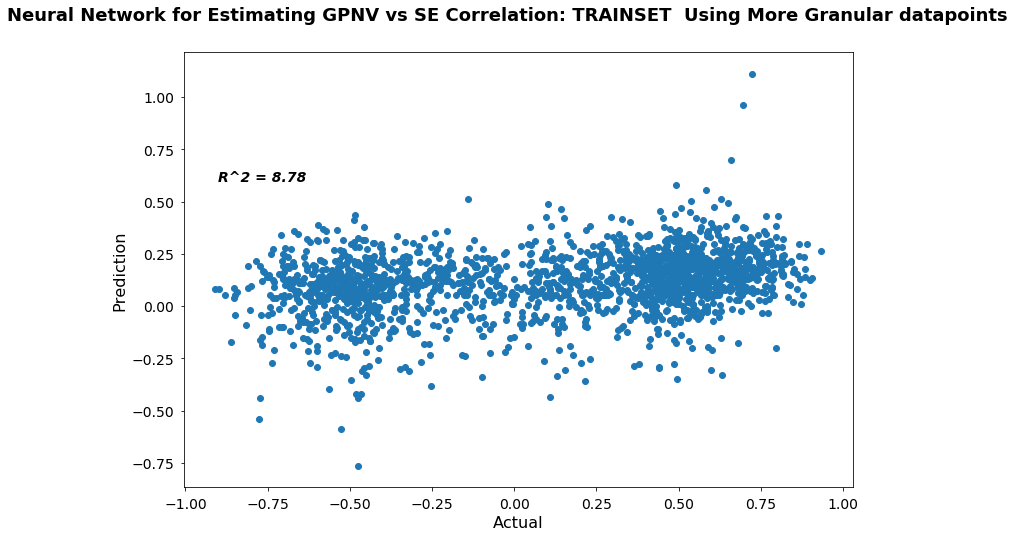

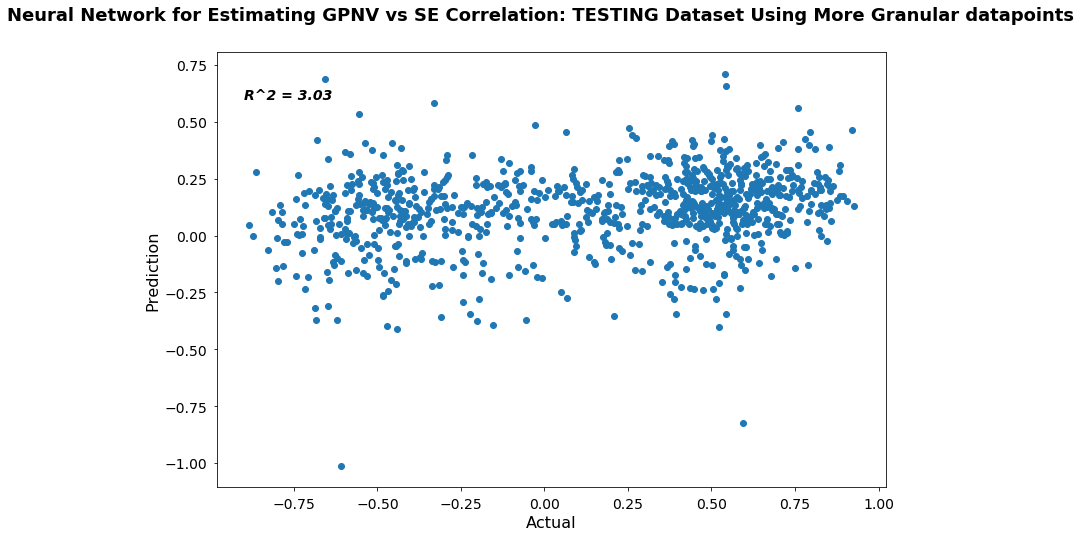

In [108]:

X_nn = df[features]
y_nn = df['correlation']
X_train, X_test, y_train, y_test = train_test_split(
    X_nn, y_nn, test_size=0.33, random_state=42)
model = MLPRegressor (hidden_layer_sizes=(8 ,) , validation_fraction = .2 , early_stopping = True , verbose= True )
model.fit(X_train , y_train )
R_2 = model.score(X_test, y_test)
y_predict = model.predict(X_test)
fig= plt.figure(figsize = (12,8))
fig.suptitle('Neural Network for Estimating GPNV vs SE Correlation: TRAINSET  Using More Granular datapoints' , fontsize = figfont_size , y = .96, fontweight = 'bold')
ax = plt.scatter(y_train , model.predict(X_train))
plt.xlabel('Actual', fontsize = labelfont_size)
plt.ylabel('Prediction' , fontsize = labelfont_size)
plt.text ( -.9,.6, 'R^2 = {:.2f}'.format(100*model.score(X_train, y_train)) , style = 'italic' , fontsize = 14 , fontweight = 'bold' )
plt.tick_params(labelsize=ticksize, pad=6)
fig= plt.figure(figsize = (12,8))
fig.suptitle('Neural Network for Estimating GPNV vs SE Correlation: TESTING Dataset Using More Granular datapoints' , fontsize = figfont_size , y = .96, fontweight = 'bold')
ax = plt.scatter(y_test , y_predict)
plt.xlabel('Actual', fontsize = labelfont_size)
plt.ylabel('Prediction' , fontsize = labelfont_size)
plt.text ( -.9,.6, 'R^2 = {:.2f}'.format(100*R_2) , style = 'italic' , fontsize = 14 , fontweight = 'bold' )
plt.tick_params(labelsize=ticksize, pad=6)

In [109]:
regr_dis = RandomForestRegressor()
regr_dis.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

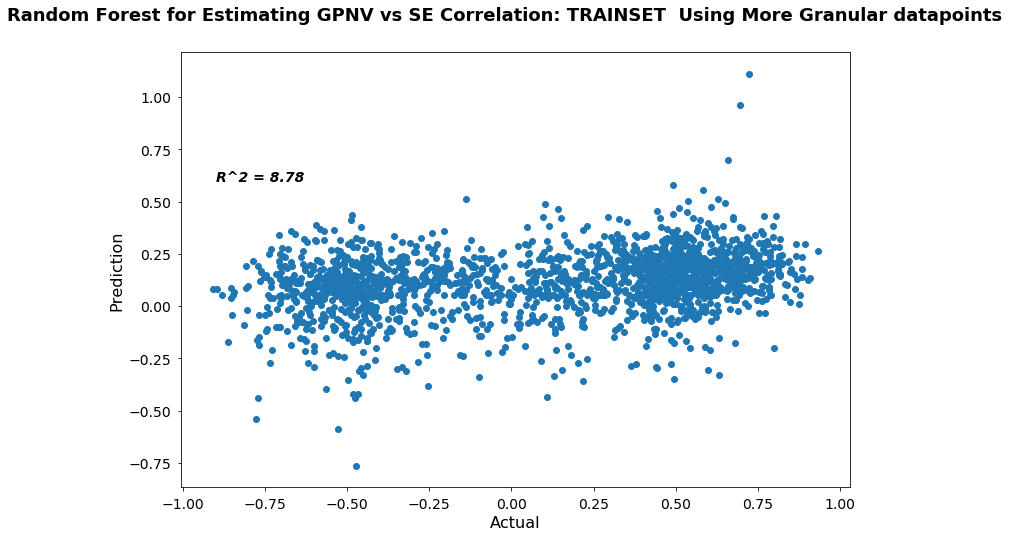

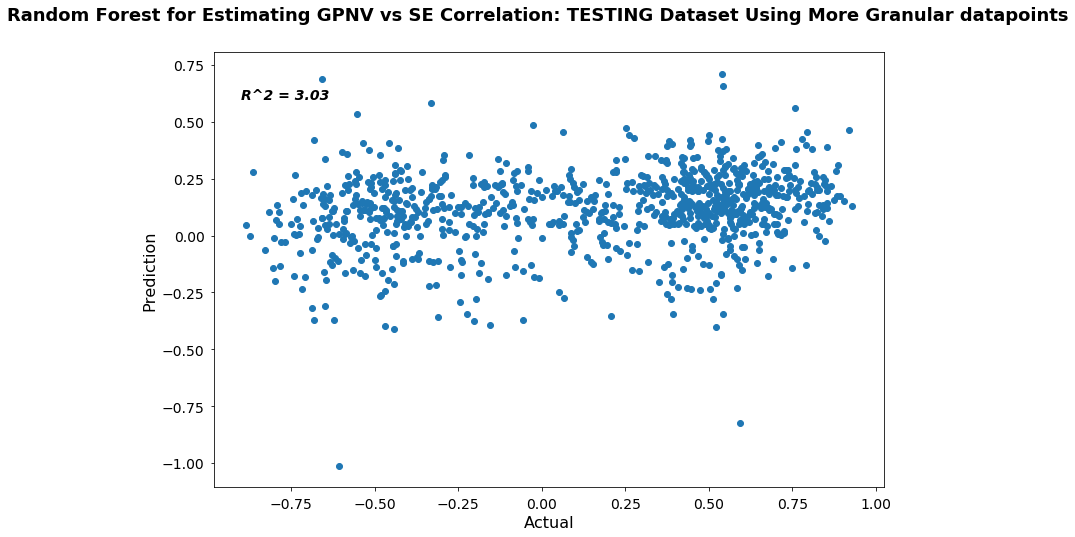

In [110]:
R_2 = model.score(X_test, y_test)
y_predict = model.predict(X_test)
fig= plt.figure(figsize = (12,8))
fig.suptitle('Random Forest for Estimating GPNV vs SE Correlation: TRAINSET  Using More Granular datapoints' , fontsize = figfont_size , y = .96, fontweight = 'bold')
ax = plt.scatter(y_train , model.predict(X_train))
plt.xlabel('Actual', fontsize = labelfont_size)
plt.ylabel('Prediction' , fontsize = labelfont_size)
plt.text ( -.9,.6, 'R^2 = {:.2f}'.format(100*model.score(X_train, y_train)) , style = 'italic' , fontsize = 14 , fontweight = 'bold' )
plt.tick_params(labelsize=ticksize, pad=6)
fig= plt.figure(figsize = (12,8))
fig.suptitle('Random Forest for Estimating GPNV vs SE Correlation: TESTING Dataset Using More Granular datapoints' , fontsize = figfont_size , y = .96, fontweight = 'bold')
ax = plt.scatter(y_test , y_predict)
plt.xlabel('Actual', fontsize = labelfont_size)
plt.ylabel('Prediction' , fontsize = labelfont_size)
plt.text ( -.9,.6, 'R^2 = {:.2f}'.format(100*R_2) , style = 'italic' , fontsize = 14 , fontweight = 'bold' )
plt.tick_params(labelsize=ticksize, pad=6)

Text(0.5, 70, 'Avg |Corr| = 0.25')

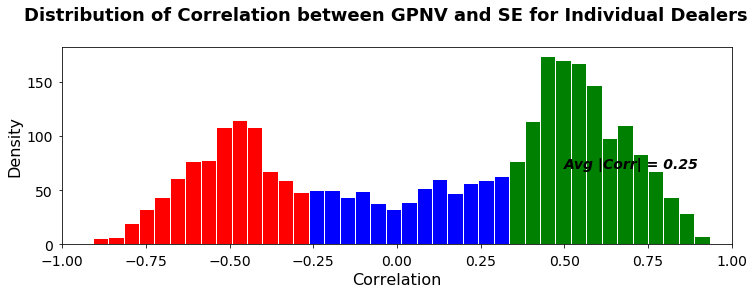

In [111]:
fig = plt.figure(figsize = (12,8))
fig.suptitle('Distribution of Correlation between GPNV and SE for Individual Dealers' , fontweight = 'bold', fontsize = figfont_size, y = .95)
ax1  = fig.add_subplot(211)
_ , bins, patches = ax1.hist(df['correlation'], 40 , edgecolor='white', linewidth=1)
for i in range(0,14): 
    patches[i].set_facecolor('r')
for i in range(14, 27):
    patches[i].set_facecolor('b')
for i in range(27,len(patches) ): 
    patches[i].set_facecolor('g')
ax1.set_xlim(-1,1)
ax1.set_xlabel('Correlation' , fontsize = labelfont_size)
ax1.set_ylabel('Density' , fontsize = labelfont_size)
plt.tick_params(labelsize=ticksize, pad=6)
tmpAvgOfAbsCorrelation = np.average(abs(coef['correlation']))
ax1.text (.5,70, 'Avg |Corr| = {:.2f}'.format(tmpAvgOfAbsCorrelation), style = 'italic' , fontsize = 14 , fontweight = 'bold' )

In [115]:
abs(df['correlation']).mean()

0.4581970874912682

In [113]:
import math

In [ ]:
# bimodal distrin=bution of correlation 
